# Coursera Data Analysis By Suman Shil

#### Importing necessary librarys

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS#wordcloud
import numpy as np # linear algebra
import pandas as pd # data processing
sns.set_theme()
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



### Loading the data

In [4]:
#Loading Coursera Dataset
mydf = pd.read_csv('data/coursea_data.csv')


### Exploring the data

In [5]:
#shape-The shape attribute of pandas. DataFrame stores the number of rows and columns 
#as a tuple (number of rows, number of columns) 

mydf.shape


(891, 7)

In [6]:
print("There are {} Rows and {} Columns in the dataset".format(mydf.shape[0], mydf.shape[1]))

There are 891 Rows and 7 Columns in the dataset


In [7]:
#The dtypes property is used to find the dtypes in the DataFrame.
#This returns a Series with the data type of each column

mydf.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [8]:

#columns attribute return the column labels of the given Dataframe

mydf.columns

Index(['Unnamed: 0', 'course_title', 'course_organization',
       'course_Certificate_type', 'course_rating', 'course_difficulty',
       'course_students_enrolled'],
      dtype='object')

In [9]:

#info() method prints information about the DataFrames
#The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [10]:
#The describe() function returns the statistical summary of the dataframe or series.
#This includes count, mean, median..etc
mydf.describe()

Unnamed: 0  course_rating
count  891.000000     891.000000
mean   445.000000       4.677329
std    257.353842       0.162225
min      0.000000       3.300000
25%    222.500000       4.600000
50%    445.000000       4.700000
75%    667.500000       4.800000
max    890.000000       5.000000

In [11]:
#Index is like an address, that's how any data point across the dataframe or series can be accessed.
print(mydf.index)

RangeIndex(start=0, stop=891, step=1)


In [12]:
#The head() function is used to get the first n rows
print(mydf.head())


   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty course_students_enrolled  
0          Beginner                     5.3k  
1      Intermediate                      17k  
2             Mix

In [13]:
##isna(). sum() returns the number of missing values in each column
missing_values = mydf.isna().sum()

In [14]:
# nan by columns
print(missing_values)

#drop_duplicates()-Return DataFrame with duplicate rows removed.
# removing duplicates
mydf.drop_duplicates()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled  
0                       5.3k  
1                        17k  
2                       130k  
3                        91k  
4                       320k  
..                       ...  
886                      52k  
887                      21k  
888                      30k  
889                     9.8k  
890                      38k  

[891 rows x 7 columns]

### Tranforming the data in different format to analyse

In [15]:
mydf = mydf.rename(columns={"Unnamed: 0": "course_id"})
mydf['course_students_enrolled']

def coursera_function(a):
    if 'k' in a:
        return float(str(a).replace('k', '')) * (10 ** 3)
    if 'm' in a:
        return float(str(a).replace('m', '')) * (10 ** 6)
    else:
        return float(a)
mydf['course_students_enrolled'] = mydf['course_students_enrolled'].apply(coursera_function)
mydf.head()

course_id                                       course_title  \
0        134  (ISC)² Systems Security Certified Practitioner...   
1        743  A Crash Course in Causality:  Inferring Causal...   
2        874                     A Crash Course in Data Science   
3        413                            A Law Student's Toolkit   
4        635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                    5300.0  
1      Intermediate                   17000.0  
2             Mixed                  130000.0  
3             Mixed                   91000.0  
4             Mixed                  320000.0

### Starting with Analysis


### The percentage of course organization

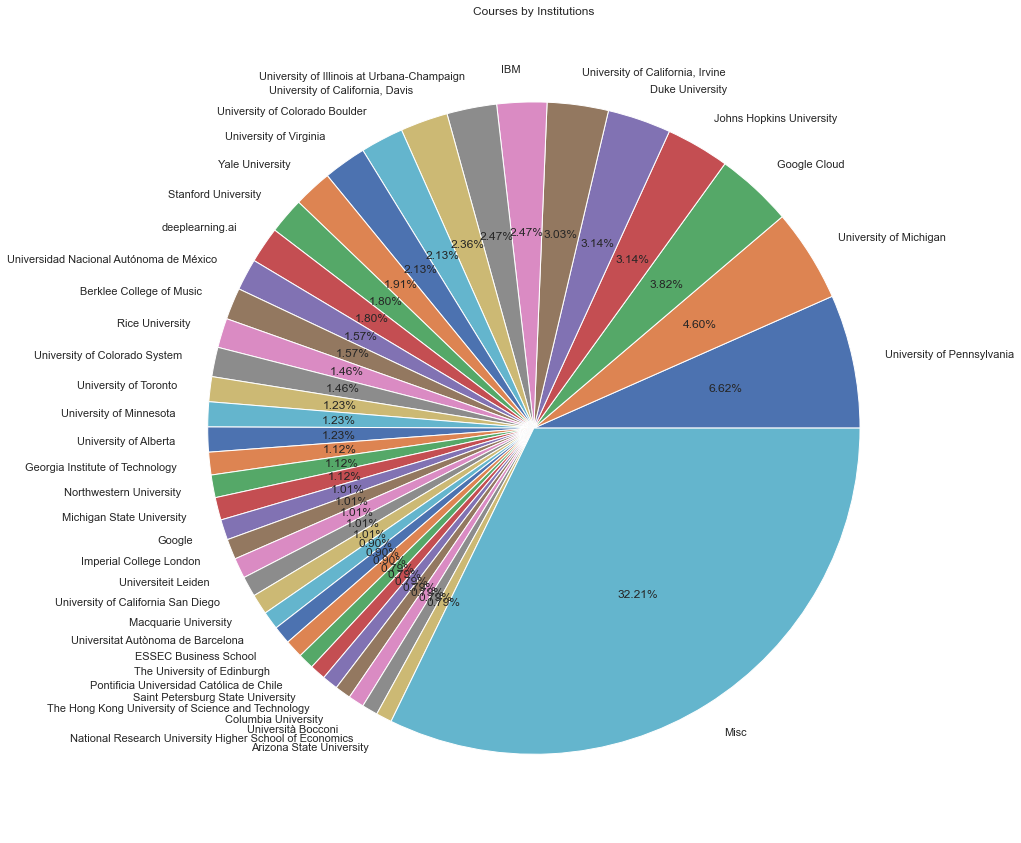

In [16]:
# Coursera Courses by different University and Organisation

df = pd.value_counts(mydf['course_organization'])/sum(pd.value_counts(mydf['course_organization']))*100
data2 = {'Organization': df.keys(),'Ratio': df[df.keys()]}


df2 = pd.DataFrame(data2)
df2 = df2[df2['Ratio']>0.7]
r = 100-df2['Ratio'].sum()
df2=df2.append(pd.DataFrame({"Organization":"Misc","Ratio":r},index=[0]))
labels = df2['Organization'].unique()

pie, ccoursera = plt.subplots(figsize=[15,15])
labels = df2['Organization'].unique()
plt.pie(x=df2['Ratio'], autopct="%.2f%%", labels=labels, pctdistance=.6)
plt.title("Courses by Institutions", fontsize=12);
plt.show()



In [17]:
# Number of University/ Organization in the Coursera Dataset
organization=mydf.course_organization.unique()
organization
len(organization)
for i,item in enumerate(organization):
    print(i+1,' ',item)

1   (ISC)²
2   University of Pennsylvania
3   Johns Hopkins University
4   Yale University
5   Indian School of Business
6   University at Buffalo
7   deeplearning.ai
8   IBM
9   Amazon Web Services
10   University of Toronto
11   University of California, Irvine
12   University of Illinois at Urbana-Champaign
13   University of Michigan
14   Universidad Nacional Autónoma de México
15   University of Colorado Boulder
16   National Research University Higher School of Economics
17   Google Cloud
18   Erasmus University Rotterdam
19   Duke University
20   University of Virginia
21   Atlassian
22   ScrumTrek
23   University of California San Diego
24   Stanford University
25   University of Colorado System
26   Copenhagen Business School
27   Macquarie University
28   Vanderbilt University
29   The University of Edinburgh
30   Technical University of Denmark (DTU)
31   Universidad Austral
32   Arizona State University
33   The Museum of Modern Art
34   National Arts Strategies
35   Univer

### Organization with the total nymber of course offered

In [115]:
#University/Organization with total number of courses
mydf['course_organization'].value_counts().head(10)

University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
Name: course_organization, dtype: int64

###  Distribution of total number of course offered by organization

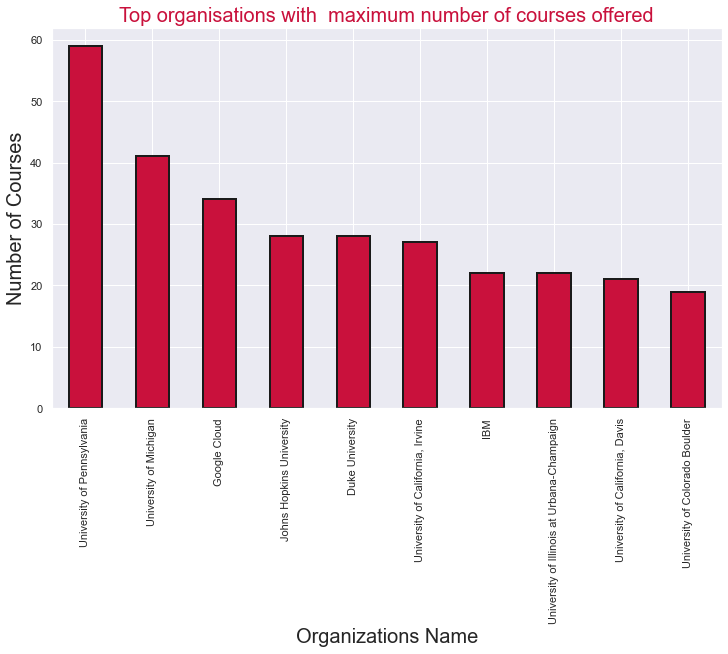

In [14]:
#Top organisations with maximum number of courses offered
x= mydf['course_organization'].value_counts(ascending=False)
a=x[:10]
a.plot(kind="bar", figsize=(12,7),color='#C9113C',width=.5, lw=2, edgecolor='k')
plt.title('Top organisations with  maximum number of courses offered',color='#C9113C', fontsize =20)
plt.xlabel('Organizations Name', fontsize =20)
plt.ylabel('Number of Courses', fontsize =20)
plt.show()



>- From the above plot we can see that <b> University of Pennsylvania</b> is in the top position in terms of number of offering course follwed by the <b> University of Michigan </b> and <b> Google Cloud</b>.
>- Definatenately it is clear that those are the top institutions of offering varitys of courses. 
>- in my next analysis, I will try to see that which organizations is popular in term number of students enrolled.

### Organization with more than 10 courses offered

In [116]:
def find_organization(data):
    dict = {}
    # course organization is put to list
    course_organization = data['course_organization'].to_list()
    # for loop used to iterate through all the organization and if it is found in the dict then increment
    for organization in   course_organization:
        if organization in dict:
            dict[organization] += 1
        else:
            dict[organization] = 1
    # creating empty list for the organization and also for count
    org = []
    counter = []

    for key, value in dict.items():
        if value > 10:
            org.append(key)
            counter.append(value)
        else:
            continue
    organization_offered_more_than_course = pd.DataFrame({'course_organization':org, 'count':counter})
    organization_offered_more_than_course.sort_values(by='count', ascending=False, inplace=True)
    return organization_offered_more_than_course

In [17]:
organization_offered_more_than_course = find_organization(mydf)
organization_offered_more_than_course.head(10)

course_organization  count
0                   University of Pennsylvania     59
8                       University of Michigan     41
11                                Google Cloud     34
1                     Johns Hopkins University     28
12                             Duke University     28
6             University of California, Irvine     27
4                                          IBM     22
7   University of Illinois at Urbana-Champaign     22
16             University of California, Davis     21
13                      University of Virginia     19

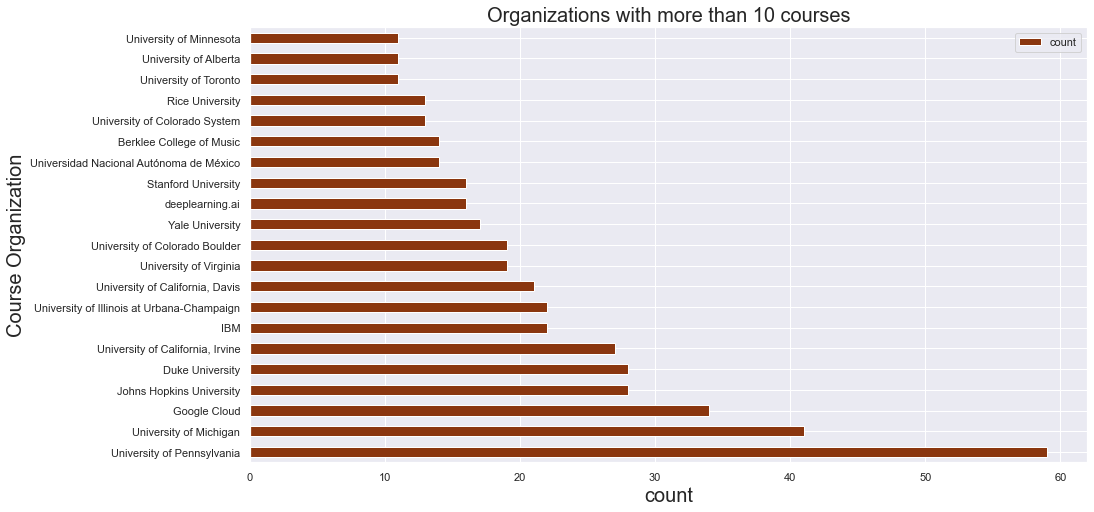

In [117]:
organization_offered_more_than_course.plot(kind='barh',figsize=(15,8),color='#8A360F', x='course_organization', y='count' )
plt.title('Organizations with more than 10 courses', fontsize =20)
plt.xlabel('count', fontsize =20)
plt.ylabel('Course Organization', fontsize =20)
plt.show()

In [118]:
# The column named 'course_students_enrolled' 
# Having k with each value lets change this with 1000 so, that column look normal
mydf['course_students_enrolled']=mydf['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

### Top 10 Organizations/University  enrolled students wise in coursera

In [119]:
#Top 10 Organizations/University  enrolled students wise in coursera

enroll = mydf.loc[:, ['course_organization','course_students_enrolled']]
enroll = pd.DataFrame(enroll.groupby(['course_organization'])['course_students_enrolled'].sum())
enroll = enroll.sort_values(by=['course_students_enrolled'], ascending=False)
enroll = enroll.head(10)
print('Organization Enrolled Students')
print(enroll)

Organization Enrolled Students
                                  course_students_enrolled
course_organization                                       
University of Michigan                             7437700
University of Pennsylvania                         5501300
Stanford University                                4854000
University of California, Irvine                   4326000
Johns Hopkins University                           4298900
Duke University                                    3967600
Yale University                                    3952000
IBM                                                2956400
deeplearning.ai                                    2863400
Google Cloud                                       2604300


In [30]:
# #  The Top 10 University/Organization who have maximum student enrollment in all the courses 
# # they have on the coursera
# enrollment=pd.DataFrame(mydf.groupby(['course_organization'])['course_students_enrolled'].sum().sort_values(ascending=False))
# enrollment=enrollment[:10]
# print(enrollment)

# # plotting
# x=enrollment.index
# y=enrollment['course_students_enrolled']
# plt.figure(figsize=(12,6))
# plt.barh(x,y,color ='#6d904f')
# plt.gca().invert_yaxis()
# plt.title('Top University and Organizations which have maximum enrollments in all their courses on coursera', fontsize =20)
# plt.xlabel('Number of Enrolled Students', fontsize =20)
# plt.ylabel('Course Organization', fontsize =20)

# plt.show()

In [120]:
df_new = mydf.groupby(['course_organization'],as_index=False)[['course_rating' ,'course_students_enrolled']].sum()

In [122]:
df_new = df_new.sort_values(by=['course_students_enrolled'], ascending=False)
df_new=df_new.nlargest(10,'course_students_enrolled')
#df_new1=df_new.head(10)
df_new

course_organization  course_rating  course_students_enrolled
135            University of Michigan          193.9                   7437700
138        University of Pennsylvania          277.1                   5501300
85                Stanford University           76.3                   4854000
123  University of California, Irvine          124.1                   4326000
48           Johns Hopkins University          130.5                   4298900
20                    Duke University          130.6                   3967600
148                   Yale University           81.9                   3952000
38                                IBM          101.5                   2956400
150                   deeplearning.ai           75.9                   2863400
34                       Google Cloud          155.8                   2604300

<function matplotlib.pyplot.show(close=None, block=None)>

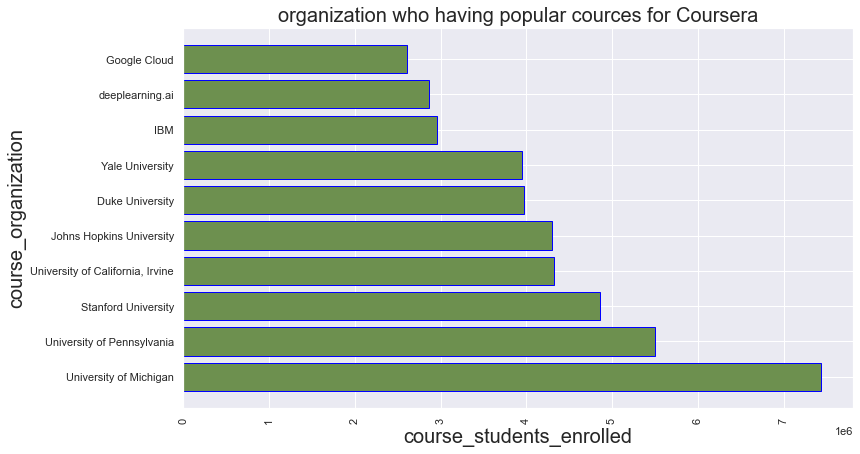

In [123]:
fig = plt.figure(figsize =(12,7))
plt.xticks(rotation='vertical')
plt.barh(df_new['course_organization'],df_new['course_students_enrolled'],color='#6d904f', edgecolor='blue')
plt.title('organization who having popular cources for Coursera', fontsize =20)
plt.ylabel('course_organization', fontsize =20)
plt.xlabel('course_students_enrolled', fontsize =20)
plt.show

>- According to the results of the above analysis, students choose to enroll themselves at the University of Michigan, followed by Pennsylyvania, Stanford University, and the University of California.
>- We can see that universities are still popular, as evidenced by the fact that the top seven positions are still held by universities rather than other IT-based companies like IBM and Google.
>- I will consider this difference who is performing better in term of popularity( Universities vs Other online courses)
>- In the following section, I will compare the top four organizations in terms of student enrollment and rating.

### The Course Students Enrolled trend observation for selected four Universities:

Text(32.01281055491255, 0.5, 'Course-Rating')

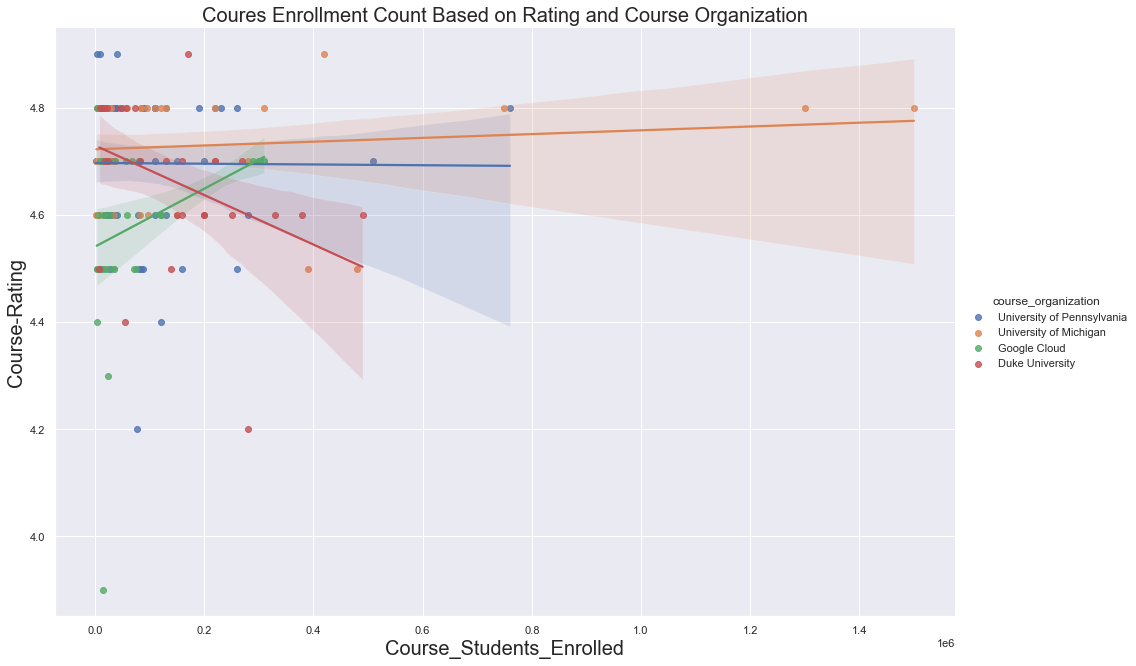

In [125]:
sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_organization", 
           data=mydf.loc[mydf["course_organization"].isin(['University of Pennsylvania','University of Michigan','Google Cloud','Duke University'   ])], 
           fit_reg=True, height=9, aspect=1.5)
plt.title("Coures Enrollment Count Based on Rating and Course Organization", fontsize =20)
plt.xlabel("Course_Students_Enrolled", fontsize =20)
plt.ylabel("Course-Rating", fontsize=20)

>- As previous finding, here also it is found that University of Michigan is in the top position in term of popularities followed by the Unversity of Pennysylivania.
>- it is worth checking that what are the popular course title of this two organization.We can compare popular course title between this two organization.
>- I will check this trend in the reviews files from coursera as well just to see that which one is the top from customer reviews. In that case I need to merge the review file with the coursera data to find this.

### Checking purpose

In [126]:
Uni_mi = course_ora['Label'][course_organization['course_title'] == 'machine-learning']

NameError: name 'course_ora' is not defined

In [134]:
col_name = ["id", "title", "organizer", "type", "rating", "difficulty", "students"]
mysort = pd.read_csv("data/coursea_data.csv",header=0, names=col_name, index_col="id").sort_values("id")


In [136]:
#Particular course institution-Google
particular_institution = "University of Michigan"
mask = mysort["organizer"] == particular_institution
mysort[mask].sort_values(by='course_students_enrolled', ascending=False)

KeyError: 'course_students_enrolled'

## Check till now

### Organization with the highest course rating
>- It is interesting some of the organizations are have highest rating, but in terms of number of enroll studnets,those organizations are enrolled less than other students. Now I will find what are those highest rating orgnaizations.

In [18]:
#Most popular course organization

In [395]:

# #Organasation
# mydf['course_organization'].value_counts().head(10)

In [165]:
#Organisation has highest course rating
hcr = round(mydf.groupby(['course_organization'])['course_rating'].mean()).to_dict()
print(hcr)

{'(ISC)²': 5.0, 'Amazon Web Services': 5.0, 'American Institute of Business and Economics': 4.0, 'American Museum of Natural History': 5.0, 'Arizona State University': 5.0, 'Atlassian': 5.0, 'Autodesk': 5.0, 'Automation Anywhere': 5.0, 'BCG': 5.0, 'Berklee College of Music': 5.0, 'Birkbeck, University of London': 5.0, 'Bloomsbury Learning Exchange': 5.0, 'California Institute of the Arts': 5.0, 'Case Western Reserve University': 5.0, 'Cisco': 5.0, 'Cloudera': 5.0, 'Columbia University': 5.0, 'ConsenSys Academy': 5.0, 'Copenhagen Business School': 5.0, 'Crece con Google': 5.0, 'Duke University': 5.0, 'E-Learning Development Fund': 5.0, 'EDHEC Business School': 5.0, 'ESADE Business and Law School': 5.0, 'ESCP Business School': 5.0, 'ESSEC Business School': 5.0, 'Eindhoven University of Technology': 5.0, 'Emory University': 4.0, 'Erasmus University Rotterdam': 5.0, 'Fundação Instituto de Administração': 4.0, 'Georgia Institute of Technology': 5.0, 'Goldsmiths, University of London': 4.0, 

In [132]:
#Organisation has highest course rating>=4.9
hcr = pd.DataFrame({'course_organization': list(hcr.keys()), 'course_rating': list(hcr.values())})
hrating = hcr[hcr['course_rating'] >=4.9]
#print(hrating)
hrating.head(20)


course_organization  course_rating
0                               (ISC)²            5.0
1                  Amazon Web Services            5.0
3   American Museum of Natural History            5.0
4             Arizona State University            5.0
5                            Atlassian            5.0
6                             Autodesk            5.0
7                  Automation Anywhere            5.0
8                                  BCG            5.0
9             Berklee College of Music            5.0
10      Birkbeck, University of London            5.0
11        Bloomsbury Learning Exchange            5.0
12    California Institute of the Arts            5.0
13     Case Western Reserve University            5.0
14                               Cisco            5.0
15                            Cloudera            5.0
16                 Columbia University            5.0
17                   ConsenSys Academy            5.0
18          Copenhagen Business School            5.0
19                    Crece con Google            5.0
20                     Duke University            5.0

>- It is clear from the above obseravation that Those are the organization top rating organization even though number of enrolled students there are lower then the other Universities organizations such Universities of Michgan.
>- It suggests that in some cases in some extent Top rating like 5 does not affect on enrolling students although ovearll rating of popular organization are high in the range of 4.6 to 4.9
>- It can be one of the reason that still most of the students are considering that Universities certfate are considered as well recognized certificate.
>- Next part I will check what are the words attract studnets to enroll

check here plese

In [166]:
#Organisation has highest course rating>=4.9
hcr = pd.DataFrame({'course_organization': list(hcr.keys()), 'course_rating': list(hcr.values()),'course_students_enrolled': list(hcr.values())})
hrating = hcr[hcr['course_rating'] >=4.9]
#print(hrating)
hrating.head(20)

course_organization  course_rating  \
0                               (ISC)²            5.0   
1                  Amazon Web Services            5.0   
3   American Museum of Natural History            5.0   
4             Arizona State University            5.0   
5                            Atlassian            5.0   
6                             Autodesk            5.0   
7                  Automation Anywhere            5.0   
8                                  BCG            5.0   
9             Berklee College of Music            5.0   
10      Birkbeck, University of London            5.0   
11        Bloomsbury Learning Exchange            5.0   
12    California Institute of the Arts            5.0   
13     Case Western Reserve University            5.0   
14                               Cisco            5.0   
15                            Cloudera            5.0   
16                 Columbia University            5.0   
17                   ConsenSys Academy            5.0   
18          Copenhagen Business School            5.0   
19                    Crece con Google            5.0   
20                     Duke University            5.0   

    course_students_enrolled  
0                        5.0  
1                        5.0  
3                        5.0  
4                        5.0  
5                        5.0  
6                        5.0  
7                        5.0  
8                        5.0  
9                        5.0  
10                       5.0  
11                       5.0  
12                       5.0  
13                       5.0  
14                       5.0  
15                       5.0  
16                       5.0  
17                       5.0  
18                       5.0  
19                       5.0  
20                       5.0

#### What words attract students to enroll
>- From this world- it will extract all the popular word found from the world cloud
>- It can be said that those words are popular

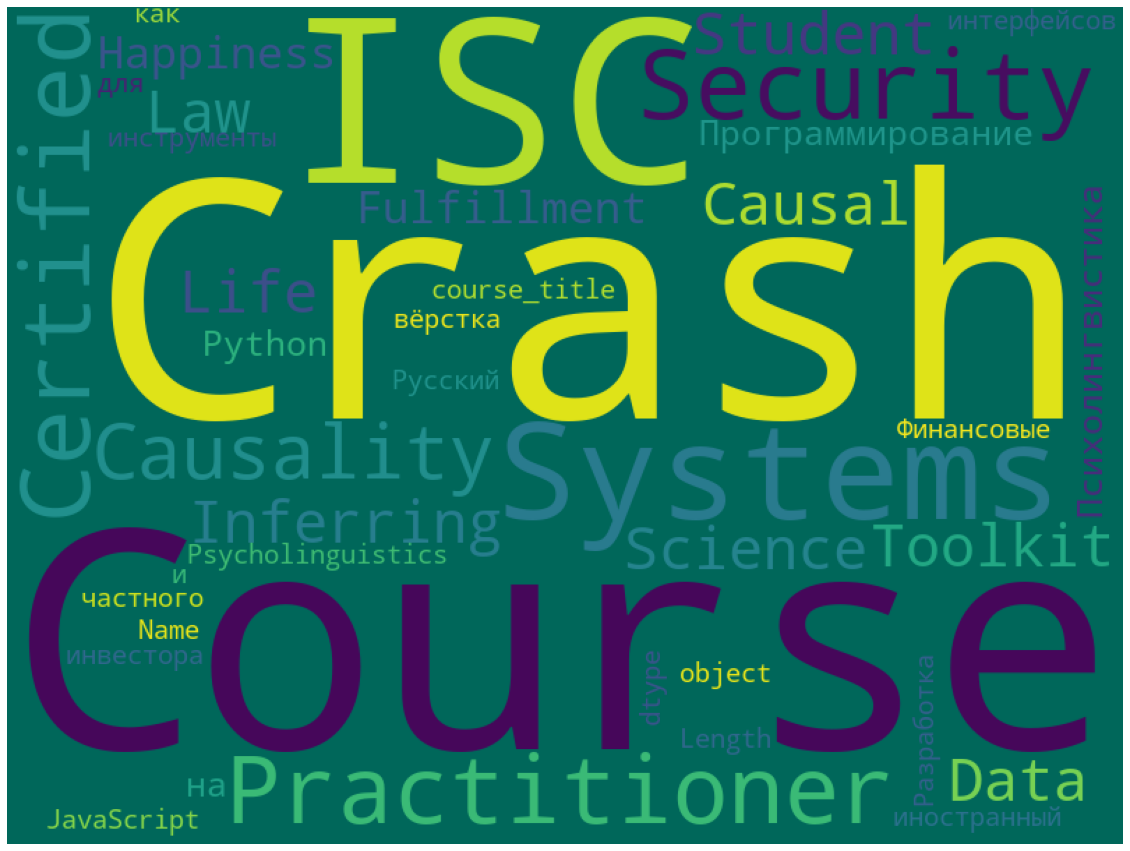

In [34]:
#A Word Cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to
#highlight popular words
#and phrases based on frequency and relevance.

#Word Cloud :To see what words attract a student to enroll the course
attract = WordCloud(width = 800, height = 600, 
            background_color ='#00675A', 
                    #Stop words are words that are filtered out before or after
                    #the natural language data (text) are processed
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(mydf['course_title']))

plt.figure(figsize = (20, 16))
plt.imshow(attract)
plt.axis("off")
plt.show()


>- It is observed from the above word visualisation same kind of word what I find from my previous finding. 
>- In my next part I will check most popular courses in coursera

### Some important analysis:

### Number of courses for different rating

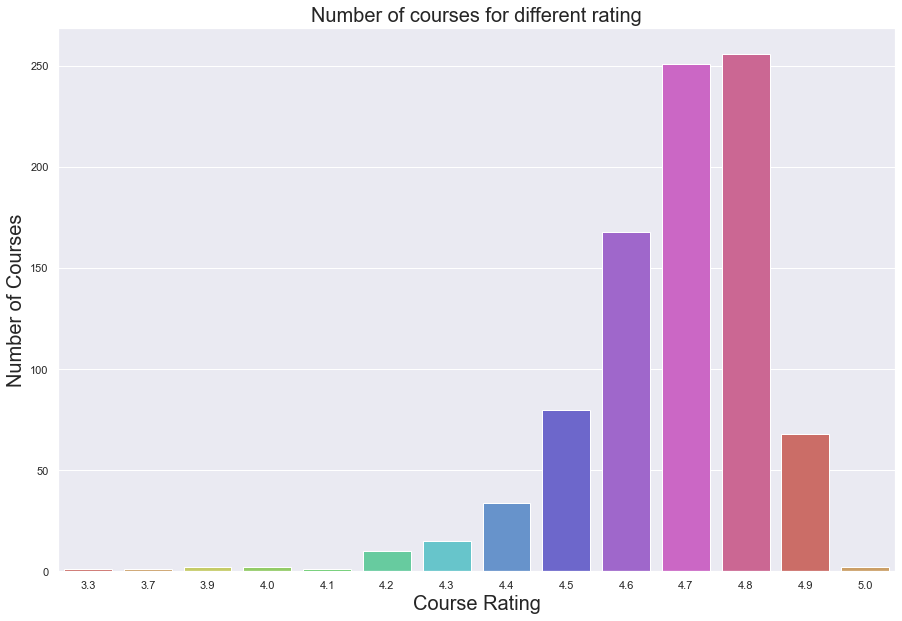

In [134]:
#Number of courses for different rating
P=sns.color_palette("hls",12)
plt.figure(figsize=(15,10)) 
sns.countplot(x='course_rating',palette=P, data=mydf)
plt.xlabel('Course Rating', fontsize =20)
plt.ylabel('Number of Courses', fontsize =20)
plt.title('Number of courses for different rating', fontsize =20)
plt.show()

>- It is observed from this visualisation that most of course in coursera rating range 4.5 to 4.9. So it can be said that they are maintaing the quality of the courses. 
>- That is why, Most of the course lies in thoses rating range.

# Most popular course Analysis:

### Top enrolled courses: 

In [135]:
#Top courses of enrolment
top_10_courses = mydf.loc[:,['course_title', 'course_students_enrolled']]
top_10_courses = top_10_courses.sort_values(by=['course_students_enrolled'], ascending=False)
top_10_courses = top_10_courses.head(10)
top_10_courses

course_title  \
564                                   Machine Learning   
815                          The Science of Well-Being   
688                               Python for Everybody   
674  Programming for Everybody (Getting Started wit...   
196                                       Data Science   
129                                     Career Success   
261                     English for Career Development   
765  Successful Negotiation: Essential Strategies a...   
199                  Data Science: Foundations using R   
211                                      Deep Learning   

     course_students_enrolled  
564                   3200000  
815                   2500000  
688                   1500000  
674                   1300000  
196                    830000  
129                    790000  
261                    760000  
765                    750000  
199                    740000  
211                    690000

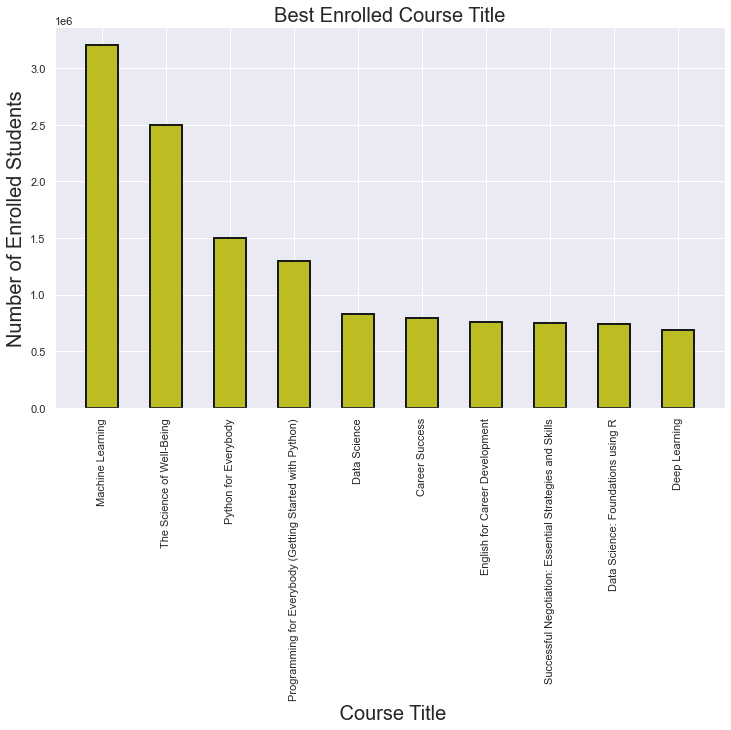

In [136]:
plt.figure(figsize=(12,7))
plt.bar(top_10_courses['course_title'], top_10_courses['course_students_enrolled'], color="tab:olive",  width=.5, lw=2, edgecolor='k')
plt.title("Best Enrolled Course Title", fontsize=20)
plt.xlabel(" Course Title", fontsize=20)
plt.ylabel("Number of Enrolled Students", fontsize=20)
#plt.yticks(range(10000,500000,10000 ))
plt.xticks(rotation=90)
plt.show()


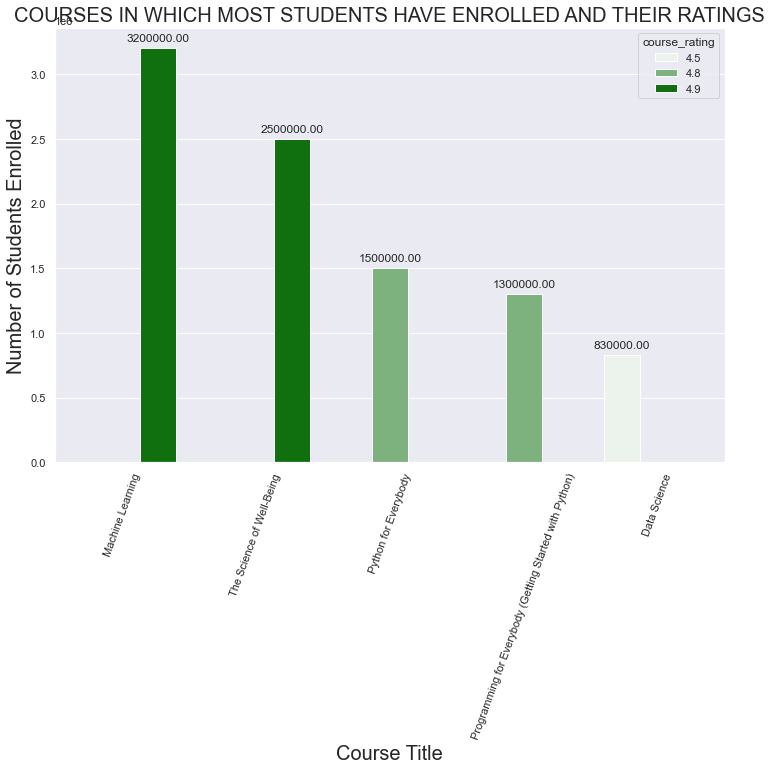

In [137]:
#COURSES WITH MOST STUDENTS ENROLLMENT AND THEIR RATINGS
large=mydf.nlargest(5, ['course_students_enrolled'])
plt.figure(figsize=(12,8))
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating", data=large, color= "green")
plt.xticks(rotation='vertical')
plt.xlabel('Course Title', fontsize =20)
plt.ylabel('Number of Students Enrolled', fontsize =20)
plt.title("COURSES IN WHICH MOST STUDENTS HAVE ENROLLED AND THEIR RATINGS", fontsize =20)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=70,ha='center')
#fig.tight_layout()
plt.show()

>- We can see from the above visualisation that Machine Learning, The Science of Well-being, Python for Everybody are the top 3 course title in Coursera in terms of their overall rating and number of enrollment of students.

### Does most popular course have higher rating: 
>- It is obeserved from the following scatter plot that high rating courses are enrolled by most of the students
>- Definately It can be analysed why this courses are popular or what makes them popular

In [38]:
#Does most popular course have higher ratings?
fig = px.scatter(mydf, x="course_students_enrolled", y="course_rating", trendline ="ols")
fig.update_layout(title="Number of students and course ratings",
                 xaxis_title="Number of students",
                 yaxis_title="Rating"
                 )
fig.show()
plt.show()

### Does highest rating courses have more students enrolled
>- It is observed from the following finding that yes, highest rating course has the more students enrolled. Now next part we will see that what are most highest rating courses and their enrolled students.

In [39]:
#Does highest ratings have more students?
fig = px.scatter(mydf, x="course_rating", y="course_students_enrolled", trendline="ols")
fig.update_layout(title="Course ratings and number of students",
                 xaxis_title="Rating",
                 yaxis_title="Number of students"
                 )
fig.show()
plt.show()

<AxesSubplot:title={'center':'course difficulty distribution based on rating and Certificate type'}, xlabel='course_difficulty', ylabel='course_rating'>

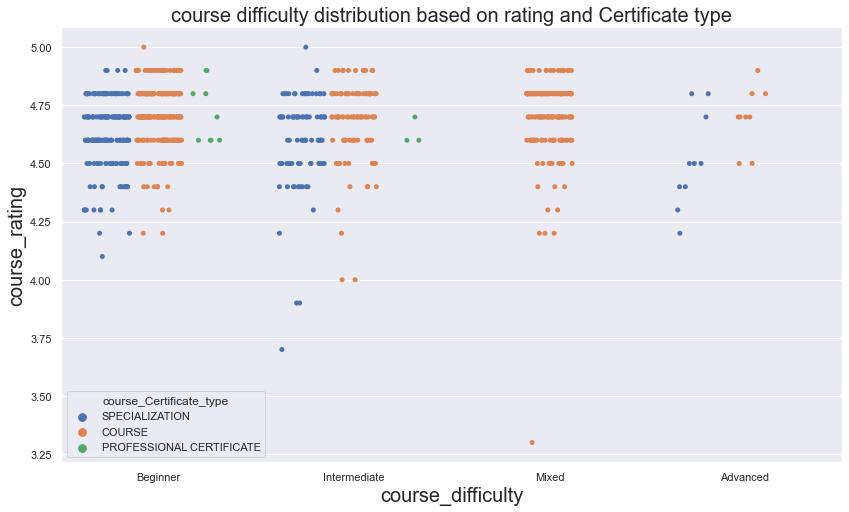

In [40]:
# The bigenner for exmaple the normal courses have most rate and number of courses than other and professional
#have high rate also but lower number of courses

plt.figure(figsize = [14,8])
plt.title("course difficulty distribution based on rating and Certificate type",fontsize =20)
plt.xlabel("COURSE-RATING", fontsize =20)
plt.ylabel("Course Difficulty", fontsize =20)
sns.stripplot(data = mydf , x = 'course_difficulty',y = 'course_rating', hue = 'course_Certificate_type',jitter = 0.35 , dodge = True)

In [41]:
px.box(mydf, x='course_Certificate_type', y='course_rating')

In [42]:
filter_df = mydf[mydf.course_Certificate_type=='SPECIALIZATION']
px.box(filter_df, x='course_difficulty', y='course_rating')

In [43]:
filter_df = mydf[mydf.course_Certificate_type=='COURSE']
px.box(filter_df, x='course_difficulty', y='course_rating')

In [44]:
px.scatter(mydf, x='course_students_enrolled', y='course_rating', color='course_difficulty', trendline ="ols")

In [45]:
course_type = mydf['course_Certificate_type'].value_counts().reset_index()
course_type

index  course_Certificate_type
0                    COURSE                      582
1            SPECIALIZATION                      297
2  PROFESSIONAL CERTIFICATE                       12

In [48]:
coursed = mydf['course_difficulty'].value_counts().reset_index()
coursed

index  course_difficulty
0      Beginner                487
1  Intermediate                198
2         Mixed                187
3      Advanced                 19

In [49]:
#Number of courses by Certification type
#Number of courses by Difficulty

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Bar(
                x = course_type['index'],
                y = course_type['course_Certificate_type'],
                name = '',
                marker = dict(color = 'yellow'),
                text=course_type['course_Certificate_type'],
),
    row=1, col=1
)
ndd= fig.add_trace(
    go.Bar(
                x = mydf['course_difficulty'].unique(),
                y = coursed['course_difficulty'],
                name = '',
                marker = dict(color = 'green'),
                text=coursed['course_difficulty'],
    ),
    row=1, col=2
)
fig.update_traces(textposition='outside')
fig.update_layout(
    showlegend=False, 
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    title_font_size=22,
)
fig.show()


####
#Number of courses by certification type
#Number of courses by difficulty

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Pie(
                values = course_type['course_Certificate_type'],
                labels = course_type['index'],
),
    row=1, col=1
)
ndd = fig.add_trace(
    go.Pie(
                values = coursed['course_difficulty'],
                labels = coursed['index'],
    ),
    row=1, col=2
)
fig.update_layout(legend=dict(orientation="h"))
fig.show()

### Details of the course title and students enrolled

In [79]:
#Details of the Course Title ...Student enrolled
mydf=mydf[ [ "course_title","course_organization", "course_Certificate_type", "course_rating", "course_difficulty", "course_students_enrolled"] ]
print(mydf.head())


                                        course_title  \
0  (ISC)² Systems Security Certified Practitioner...   
1  A Crash Course in Causality:  Inferring Causal...   
2                     A Crash Course in Data Science   
3                            A Law Student's Toolkit   
4                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                      5300  
1      Intermediate                     17000  
2             Mixed                    130000  
3             Mixed                   

In [80]:
# course_type = mydf['course_Certificate_type'].value_counts().reset_index()
# course_type

index  course_Certificate_type
0                    COURSE                      582
1            SPECIALIZATION                      297
2  PROFESSIONAL CERTIFICATE                       12

In [81]:
# plt.figure(figsize=(10,4))
# nums = mydf['course_Certificate_type'].value_counts()
# plt.axis('off')
# plt.text(0.08,0.7,'Course Certificate ype',c='#ffff00',fontsize=36,fontweight='bold')
# plt.text(0.08,0.7,'Course Certificate type',c='#fddc5c',fontsize=36,fontweight='bold')
# plt.text(0.08,.35,'582',c='#1b1407',fontsize=25,fontweight='bold')
# print('')
# plt.text(0.085,.29,'COURSE',c='#0cb577',fontsize=15,fontweight='bold')
# plt.text(0.4,.35,'297',c='#1b1407',fontsize=25,fontweight='bold')
# plt.text(0.35,.29,'SPECIALIZATION',c='#0cb577',fontsize=15,fontweight='bold')
# plt.text(0.77,.35,'12',c='#1b1407',fontsize=25,fontweight='bold')
# plt.text(0.65,.29,'PROFESSIONAL CERTIFICATE',c='#0cb577',fontsize=15,fontweight='bold')

In [98]:
# #Course certificate types
# colors =  ["green", "#FCFF00","#0600FF"]

# ax= mydf['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
#             autopct='%1.1f%%',
#             figsize=(15, 10))
# plt.title('Course Certificate Types', fontsize =20) 
# plt.show()

In [99]:
# # Visualizing the frequency of courses in each category of course certificate type attribute
# P=sns.color_palette("hls",20)
# sns.countplot(x='course_Certificate_type',palette =P,data=mydf)
# plt.title('Visualize each category of Course Certificate type', fontsize =20)

# # ax = mydf['course_Certificate_type'].value_counts().plot(kind='bar', figsize=(12,8), color='#6d904f',width=.5, lw=2, edgecolor='k')
# # ax.set_alpha(0.5)
# # ax.set_title('Course_Certificate_Type', fontsize =20)
# # ax.set_ylabel('Count', fontsize =20)
# # ax.set_xlabel('Certificate Type', fontsize =20)

### Which type of certificate have most courses:
>- It is obeserved form the following bar plot general courses certificate type provides most of the courses
>- And it is followed by Specialization and Proffesional

In [100]:
# # Here We can observe that most courses have the general course Certificate type
# # There are almost 300 courses having a specialization certificate
# # Very few courses granting a professional certificate


# #Types of course available in coursera
# ccoursera = mydf['course_Certificate_type'].value_counts().plot(kind='bar', figsize=(12,6), color='#002569', width=.5, lw=2, edgecolor='k')
# ccoursera.set_alpha(0.5)
# ccoursera.set_title('course_certificate_type',fontsize =20)
# ccoursera.set_xlabel('Course Certificate Type', fontsize =20)
# ccoursera.set_ylabel('Count', fontsize =20)

# totals = []

# # find the values and append to list
# for i in ccoursera.patches:
#     totals.append(i.get_height())

# # set individual bar lables using above list
# total = sum(totals)

# # set individual bar lables using above list
# for i in ccoursera.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ccoursera.text(i.get_x(), i.get_height()+.5, \
#             str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
#                 color='green')

# plt.show()

#### What words attract students to enroll
>- From this world- it will extract all the popular word found from the world cloud
>- It can be said that those words are popular

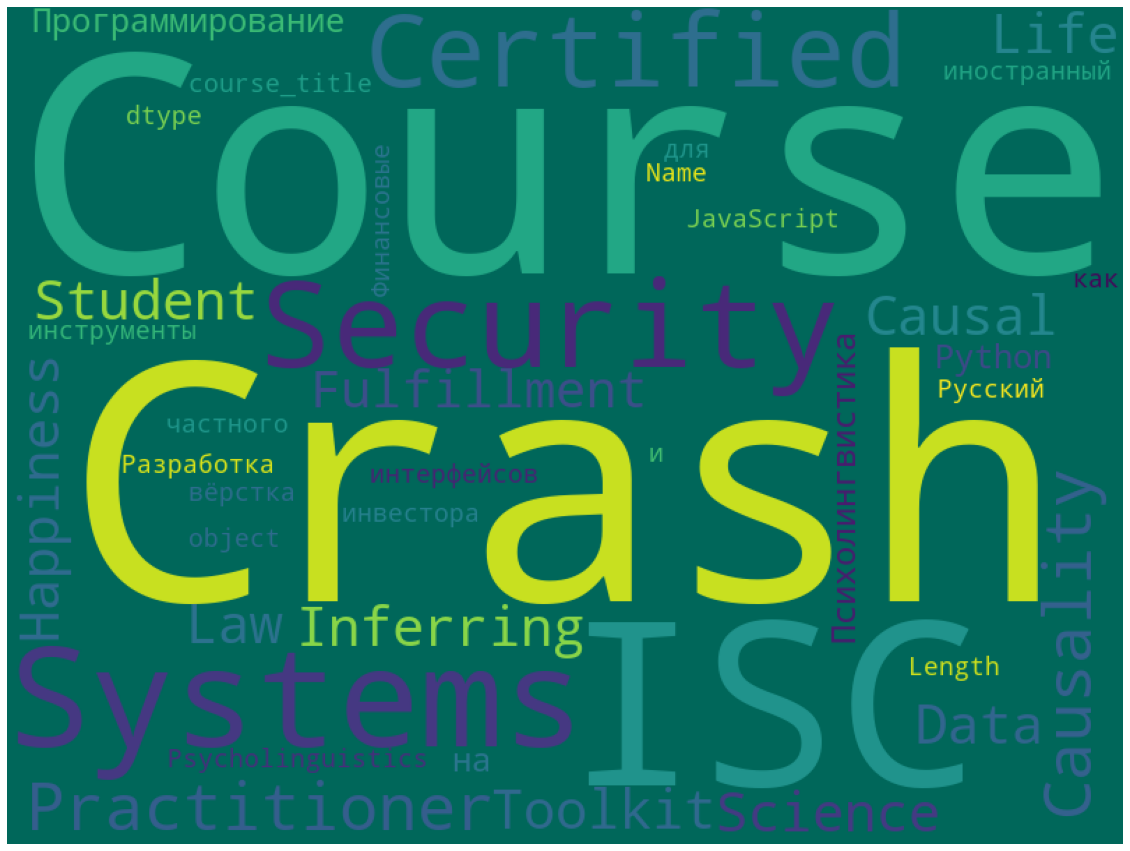

In [92]:
#A Word Cloud (also known as a tag cloud) is a visual representation of words. Cloud creators are used to
#highlight popular words
#and phrases based on frequency and relevance.

#Word Cloud :To see what words attract a student to enroll the course
attract = WordCloud(width = 800, height = 600, 
            background_color ='#00675A', 
                    #Stop words are words that are filtered out before or after
                    #the natural language data (text) are processed
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(mydf['course_title']))

plt.figure(figsize = (20, 16))
plt.imshow(attract)
plt.axis("off")
plt.show()


#### Course difficulty analysis:

In [50]:
#course difficulty
coursed = mydf['course_difficulty'].value_counts().reset_index()
coursed

index  course_difficulty
0      Beginner                487
1  Intermediate                198
2         Mixed                187
3      Advanced                 19

#### Displaying the number of courses ny Certification type and the Number of courses by difficulty types

In [93]:
#Number of courses by Certification type
#Number of courses by Difficulty

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Bar(
                x = course_type['index'],
                y = course_type['course_Certificate_type'],
                name = '',
                marker = dict(color = 'yellow'),
                text=course_type['course_Certificate_type'],
),
    row=1, col=1
)
ndd= fig.add_trace(
    go.Bar(
                x = mydf['course_difficulty'].unique(),
                y = coursed['course_difficulty'],
                name = '',
                marker = dict(color = 'green'),
                text=coursed['course_difficulty'],
    ),
    row=1, col=2
)
fig.update_traces(textposition='outside')
fig.update_layout(
    showlegend=False, 
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    title_font_size=22,
)
fig.show()


####
#Number of courses by certification type
#Number of courses by difficulty

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
ncc = fig.add_trace(
    go.Pie(
                values = course_type['course_Certificate_type'],
                labels = course_type['index'],
),
    row=1, col=1
)
ndd = fig.add_trace(
    go.Pie(
                values = coursed['course_difficulty'],
                labels = coursed['index'],
    ),
    row=1, col=2
)
fig.update_layout(legend=dict(orientation="h"))
fig.show()

>- it is obsered form the above plot that the number of courses by the certicate type general courses is in the top position, followed by Specialization
>- But in term of difficulty beginner courses is in the top position, follwed by intermediate, Mixed and Advanced. 

>- We can see from the above information that Machine learning is one of the top course in terms of number of students enrolled in the course. 

In [325]:
# #Number of courses by certification type
# #Number of courses by difficulty

# fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],subplot_titles=('Number of courses by certification type', 'Number of courses by difficulty'))
# ncc = fig.add_trace(
#     go.Pie(
#                 values = course_type['course_Certificate_type'],
#                 labels = course_type['index'],
# ),
#     row=1, col=1
# )
# ndd = fig.add_trace(
#     go.Pie(
#                 values = coursed['course_difficulty'],
#                 labels = coursed['index'],
#     ),
#     row=1, col=2
# )
# fig.update_layout(legend=dict(orientation="h"))
# fig.show()

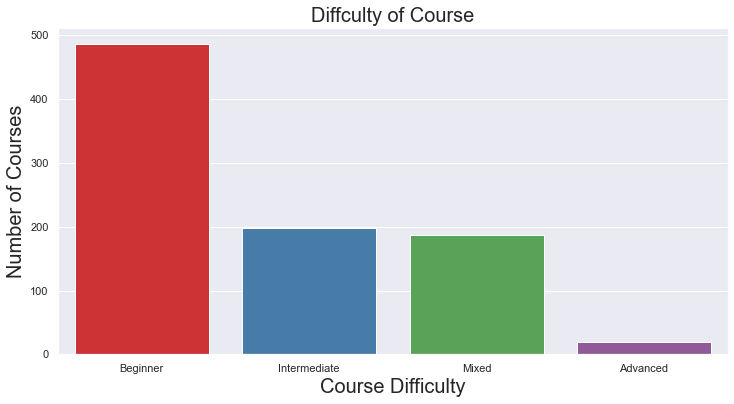

In [63]:
# The most popular courses is normal courses
#The Beginner courses are the most popular courses in coursera
#But the professional courses type are the most type of courses that student enrolled in it
#then the mixed difficulty type of courses also the most that student enrolled then the beginner courses

# Visualizing the frequency of courses in each category of course difficulty attribute
#Diffculty of course
P=sns.color_palette("hls",10)
plt.figure(figsize=(12,6)) 
sns.countplot(x='course_difficulty',palette = 'Set1', data=mydf)
plt.xlabel('Course Difficulty', fontsize =20)
plt.ylabel('Number of Courses', fontsize =20)
plt.title("Diffculty of Course", fontsize =20)
plt.show()


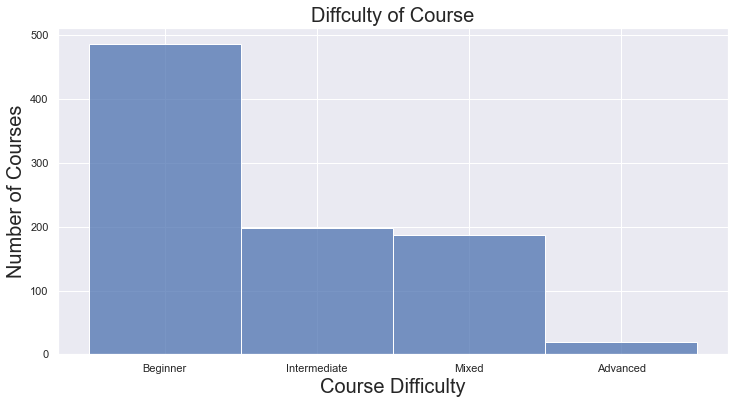

In [338]:
# The most popular courses is normal courses
#The Beginner courses are the most popular courses in coursera
#But the professional courses type are the most type of courses that student enrolled in it
#then the mixed difficulty type of courses also the most that student enrolled then the beginner courses

# Visualizing the frequency of courses in each category of course difficulty attribute
#Diffculty of course
P=sns.color_palette("hls",10)
plt.figure(figsize=(12,6)) 
sns.histplot(x='course_difficulty',palette = 'Set1',data=mydf)
plt.xlabel('Course Difficulty', fontsize =20)
plt.ylabel('Number of Courses', fontsize =20)
plt.title("Diffculty of Course", fontsize =20)
plt.show()


### Overall rating analysis depending on the number of courses

In [52]:
fig = ff.create_distplot([mydf['course_rating']],
                        ['courses'],
                         show_rug=False,
                         bin_size=0.05,
                         colors=['#188E05']
)
fig.add_vline(x=mydf['course_rating'].median(),
                  line_dash='dash',
                  line_color='#6E96D5',
                  line_width=5,
                  annotation_text='Median',
                 )
fig.add_vline(x=mydf['course_rating'].mean(),
                  line_dash='dash',
                  line_color='#455AB8',
                  line_width=5,
                  annotation_text='Mean'
                 )
fig.add_vline(x=mydf['course_rating'].mode().values[0],
                  line_dash='dash',
                  line_color='#C0D33F',
                  line_width=5,
                  annotation_text='Mode'
                 )
fig.update_layout(
        annotations=[dict(
          textangle=-60,
          y = 1.14,
          align='center',
        )],
        title_text='Ratings of Courses',
        showlegend=False,
        paper_bgcolor='rgb(248, 248, 255)',
        plot_bgcolor='rgb(200, 208, 255)',
        title_font_size=15
    )

fig.show()


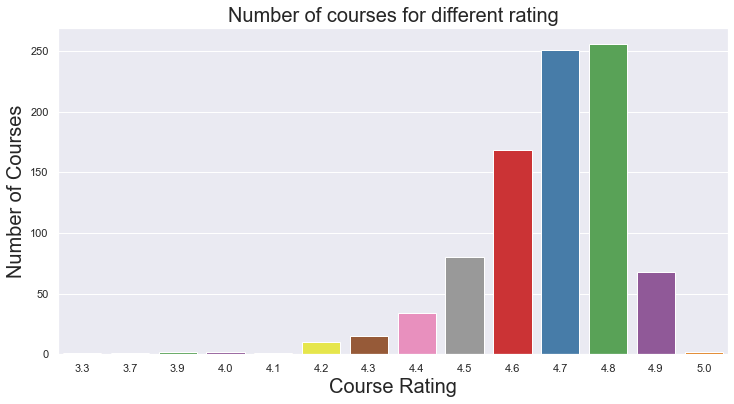

In [144]:
#Visualizing the distribution of courses based on the course rating attribute
#Number of courses for different rating
#We can observe that most courses have ratings in the range: 4.6 to 4.8
# Almost 250 courses having rating equal to 4.8
plt.figure(figsize=(12,6)) 
sns.countplot(x='course_rating',palette = "Set1",data=mydf)
plt.xlabel('Course Rating', fontsize =20)
plt.ylabel('Number of Courses', fontsize  =20)
plt.title('Number of courses for different rating', fontsize =20)
plt.show()


#### 

In [161]:
#Students Enrolled
course_level = pd.DataFrame(mydf.groupby('course_difficulty')['course_students_enrolled'].sum())

course_level= course_level.reset_index()
fig = px.bar(course_level.sort_values(by='course_students_enrolled',ascending=False), x="course_difficulty", y="course_students_enrolled", color='course_difficulty')
fig.update_layout(title_text="Number of students each Course Level",
                 xaxis_title="Level",
                 yaxis_title="Count")
fig.show()
plt.show()

### Top courses based on rating

In [146]:
#Top 10 courses based on rating
findtencourse=mydf[['course_title','course_rating']]
Tencourse = findtencourse.nlargest(10,['course_rating'])
Tencourse

course_title  course_rating
251  El Abogado del Futuro: Legaltech y la Transfor...            5.0
432                       Infectious Disease Modelling            5.0
36   Agile и Scrum в работе над проектами и продуктами            4.9
40                             American Contract Law I            4.9
61   Aprendiendo a aprender: Poderosas herramientas...            4.9
65                      Arizona State University TESOL            4.9
70   Aspectos básicos de la planificación y la gest...            4.9
82   Become a CBRS Certified Professional Installer...            4.9
98                  Boosting Creativity for Innovation            4.9
99   Brand Management: Aligning Business, Brand and...            4.9

In [53]:

#Highest rated Courses
hrc = pd.DataFrame(mydf.groupby('course_title')['course_rating'].mean())

hrc = hrc.sort_values(by='course_rating', ascending=False)[:20]

hrc = hrc.reset_index()

print(hrc)


                                         course_title  course_rating
0                        Infectious Disease Modelling            5.0
1   El Abogado del Futuro: Legaltech y la Transfor...            5.0
2                                Stories of Infection            4.9
3                  Boosting Creativity for Innovation            4.9
4   Brand Management: Aligning Business, Brand and...            4.9
5   Understanding Einstein: The Special Theory of ...            4.9
6                 Bugs 101: Insect-Human Interactions            4.9
7   Build a Modern Computer from First Principles:...            4.9
8                          Introduction to Psychology            4.9
9       Everyday Parenting: The ABCs of Child Rearing            4.9
10      Troubles du spectre de l'autisme : diagnostic            4.9
11    Formulación y evaluación de proyectos complejos            4.9
12                           Egiptología (Egyptology)            4.9
13                      Effective 

In [54]:
temp_df = pd.DataFrame(mydf.groupby('course_organization')['course_rating'].mean())
temp_df = temp_df.reset_index()
course_org_df = course_org_df.merge(temp_df, on='course_organization', how='inner')
fig = px.bar(course_org_df.sort_values(by='course_rating', ascending=False), x='course_rating', y='course_organization', color='course_organization', orientation='h',
             height=550)
fig.update_layout(title_text='20 highest rated course organization',
                 xaxis_title="Ratings",
                 yaxis_title="Course organization")
fig.show()
plt.show()

NameError: name 'course_org_df' is not defined

### Rating Distribution

In [55]:
#Rating Distribution
fig = px.histogram(mydf, x="course_rating")
fig.update_layout(title_text="Rating Distribution",
                 xaxis_title="Rating",
                 yaxis_title="Count")
fig.show()
plt.show()

In [56]:
#Rating distribution of each certification
plt.figure(figsize=(10,7))
fig = px.histogram(mydf, x="course_rating", color='course_Certificate_type')
fig.update_layout(title_text="Rating distribution each Certification",
                 xaxis_title="Rating",
                 yaxis_title="Count")
fig.show()

plt.show()


<Figure size 720x504 with 0 Axes>

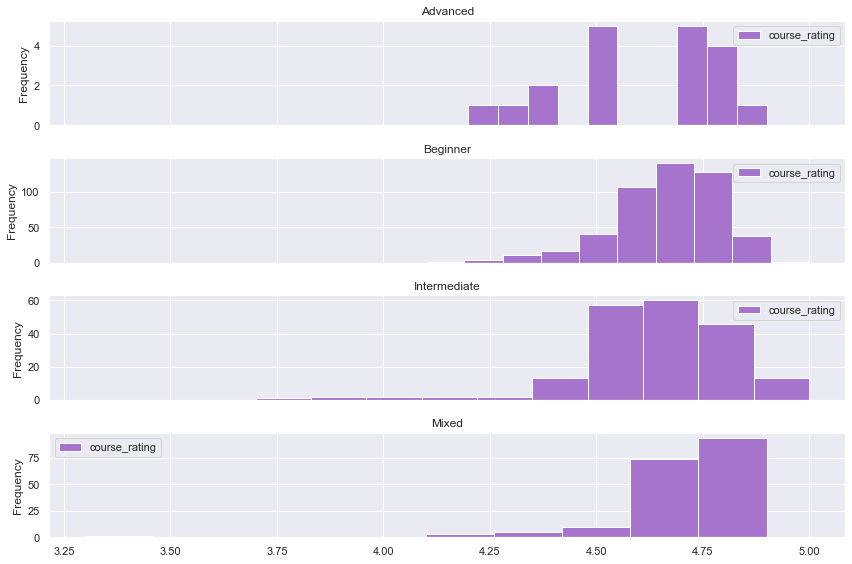

In [140]:
statistics = mydf.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(12, 8))

for i, (type,rating) in enumerate(statistics):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend= True,color="#A774CD",title=type)
fig.tight_layout()

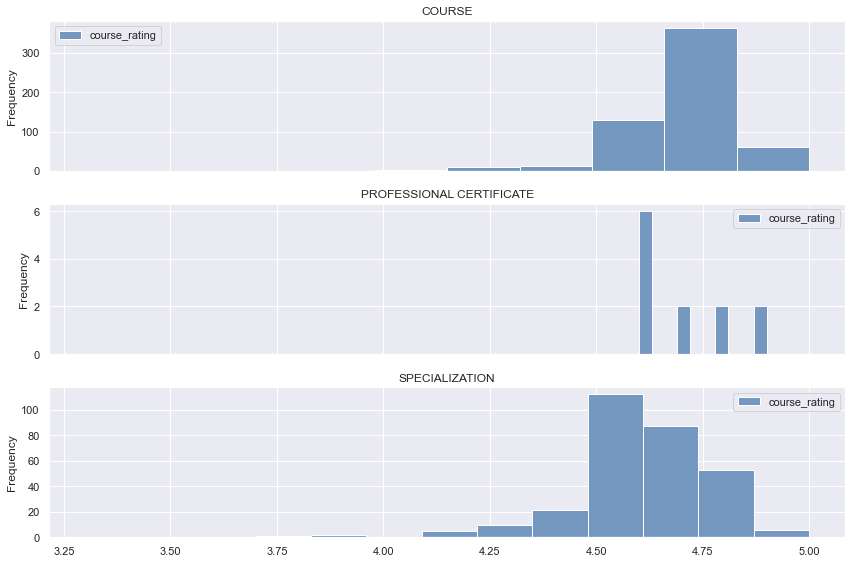

In [144]:
statistics = mydf.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(12, 8))

for i, (type,rating) in enumerate(statistics):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend= True,color="#7498C0",title=type,bins=10)
fig.tight_layout()

In [105]:
statistics = mydf.groupby('course_Certificate_type')['course_rating']
statistics.describe()

count      mean       std  min  25%   50%  75%  max
course_Certificate_type                                                      
COURSE                    582.0  4.707045  0.151647  3.3  4.6  4.70  4.8  5.0
PROFESSIONAL CERTIFICATE   12.0  4.700000  0.120605  4.6  4.6  4.65  4.8  4.9
SPECIALIZATION            297.0  4.618182  0.167874  3.7  4.5  4.60  4.7  5.0

In [106]:
#statistics.describe()

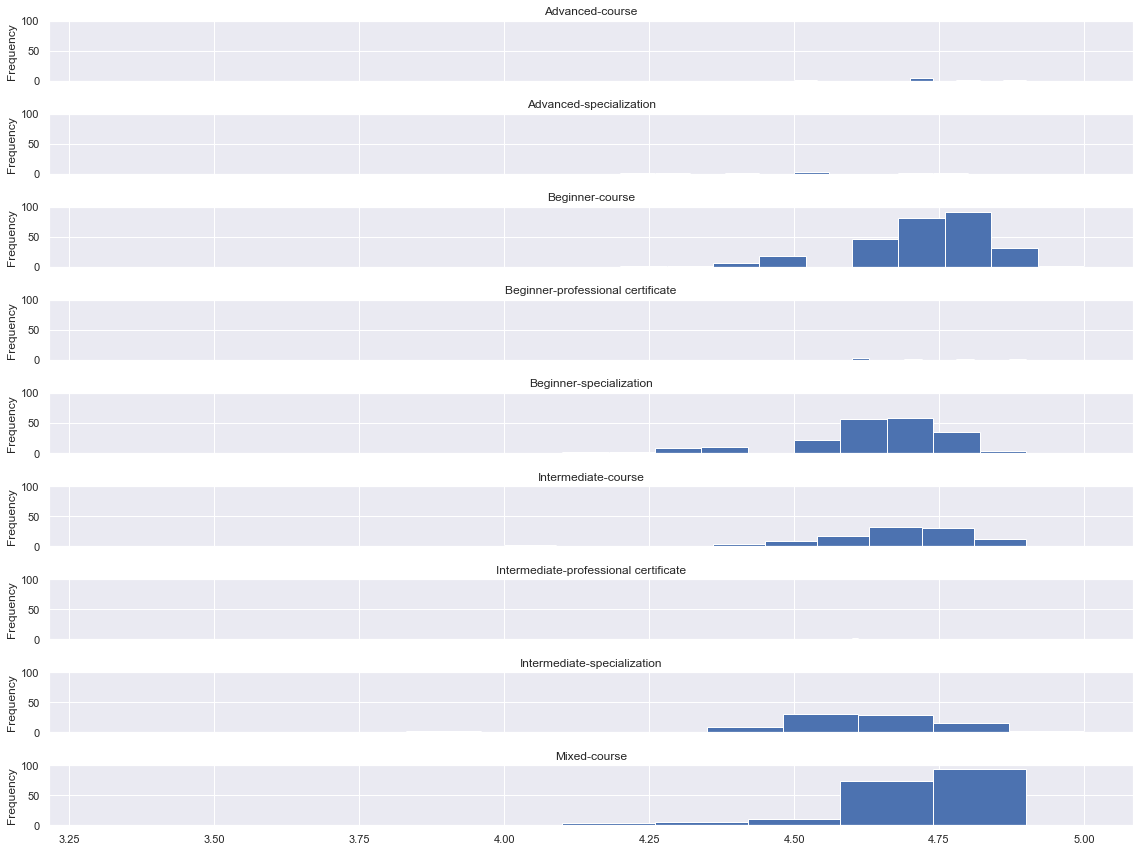

In [360]:
statistics = mydf.groupby(['course_difficulty','course_Certificate_type'])['course_rating']
fig, axes = plt.subplots(statistics.ngroups, sharex=True, figsize=(16, 12))

for i, (type,rating) in enumerate(statistics):
    axes[i].set_ylim(0, 100)
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type[0]+"-"+type[1].lower(),bins=10)
fig.tight_layout()
#Mixed - Course has a unstable distribution, othes have normal distribution.

<AxesSubplot:ylabel='course_difficulty'>

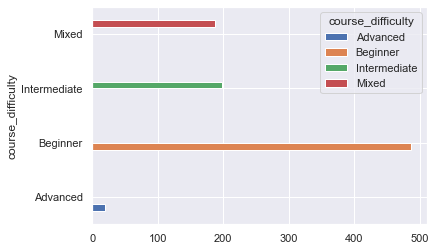

In [107]:
mydf.groupby('course_difficulty').course_difficulty.value_counts().unstack().plot.barh()

<AxesSubplot:ylabel='course_Certificate_type'>

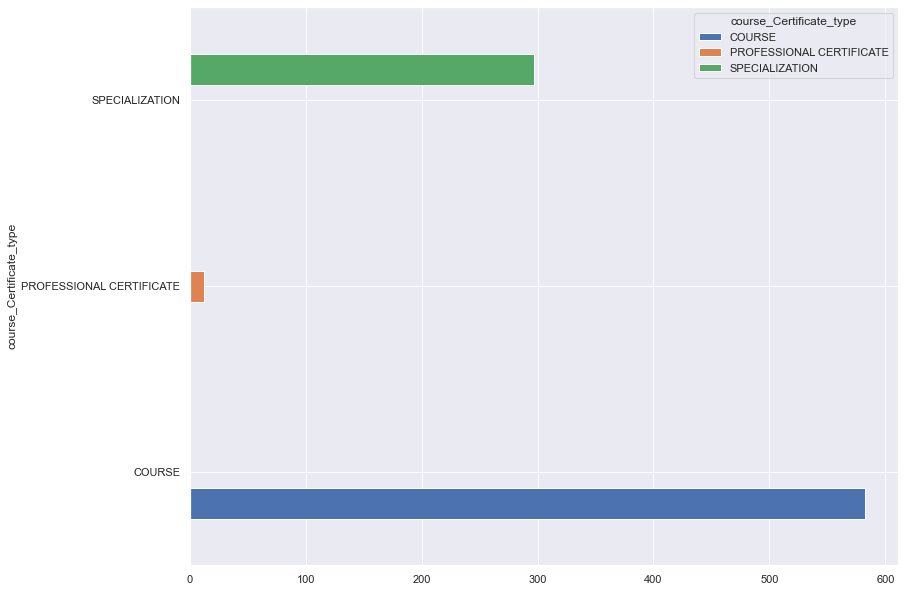

In [274]:

#Beginner > Intermidiate > Advanced. 
#Courses > Specialization > Professional certificate. 
mydf.groupby('course_Certificate_type').course_Certificate_type.value_counts().unstack().plot.barh()

In [150]:
correlation = mydf.corr()
correlation

course_id  course_rating  course_students_enrolled
course_id                  1.000000      -0.059561                 -0.360839
course_rating             -0.059561       1.000000                  0.071090
course_students_enrolled  -0.360839       0.071090                  1.000000

<AxesSubplot:title={'center':'High correlation between course_rating and course_student_enrollment'}>

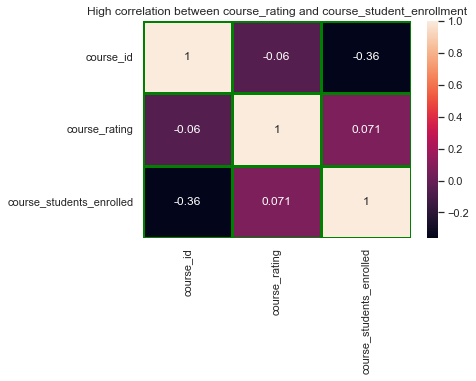

In [151]:
#This heatmap show that there is a high correlation between course_rating and course_student_enroolment.
#Its mean if the course_rating is high then definately student enroll those course
plt.title('High correlation between course_rating and course_student_enrollment', fontsize = 12) # title with fontsize 12
# setting the parameter values
linewidths = 3
linecolor = "green"

sns.heatmap(correlation, linewidths=linewidths,
                linecolor=linecolor, annot=True)


<Figure size 1440x1152 with 0 Axes>

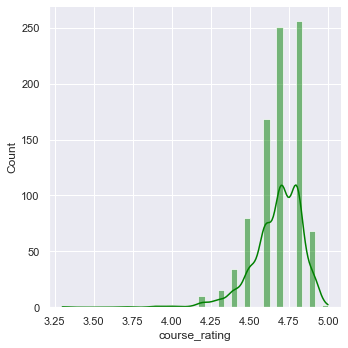

In [147]:

# set the background style of the plot
plt.figure(figsize=(20,16)) # Figure Size
#sns.set_style('whitegrid')
#sns.distplot(mydf.course_rating, kde = True)
sns.displot(mydf.course_rating, kde=True,color='green')

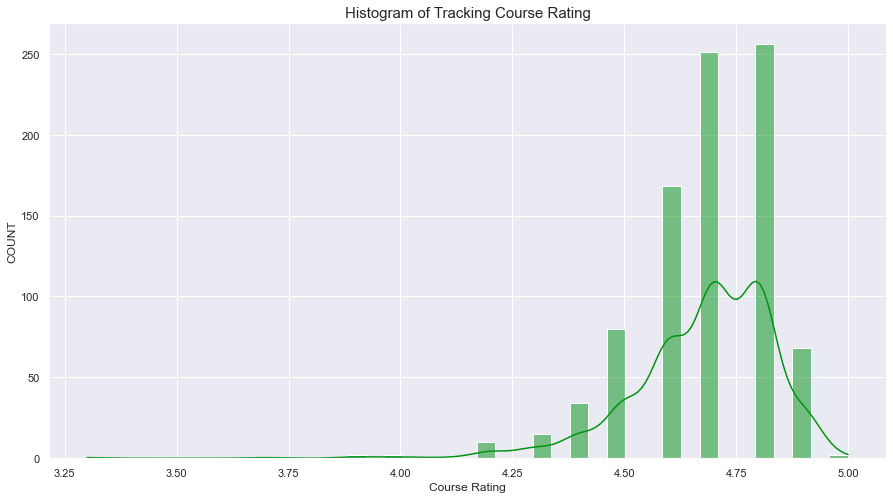

In [114]:
# # set the background style of the plot
# plt.figure(figsize=()) # Figure Size
# #sns.set_style('whitegrid')
# #sns.distplot(mydf.course_rating, kde = True)
# sns.displot(mydf.course_rating, kde=True,color='green')

plt.figure(figsize=(15, 8))
sns.histplot(data= mydf, x=mydf["course_rating"], color="#009213", kde= True)
plt.title("Histogram of Tracking Course Rating", fontsize=15)
plt.xlabel("Course Rating", fontsize=12)
plt.ylabel("COUNT", fontsize=12)
plt.show()


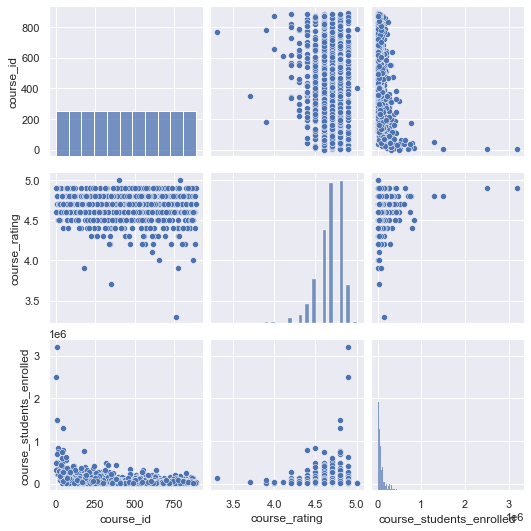

In [152]:

#pairplot
sns.pairplot(mydf)

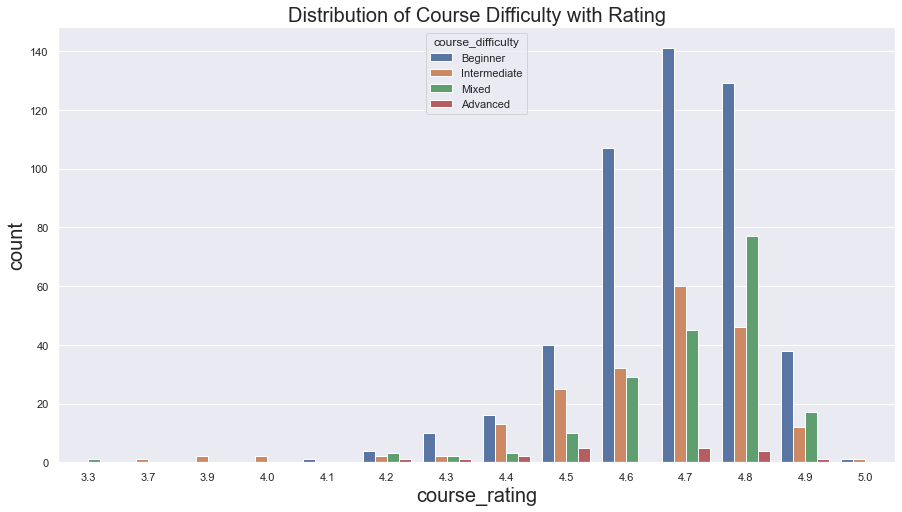

In [130]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set(rc={'figure.figsize':(12.7,10.27)})
ax.set_title("Distribution of Course Difficulty with Rating", fontsize =20)
ax.set_ylabel('Count', fontsize =20)
ax.set_xlabel('Course Rating', fontsize =20)
#sns.set_titile("DISTRIBUTION OF DIFFICULTY LEVEL AND CERTIFICATE TYPE")
sns.countplot(data=mydf,x = 'course_rating',hue= 'course_difficulty',ax=ax)
plt.show()
# fig,ax = plt.subplots(figsize=(12,8))
# sns.countplot(data=mydf,x = 'course_rating',hue= 'course_difficulty',ax=ax)


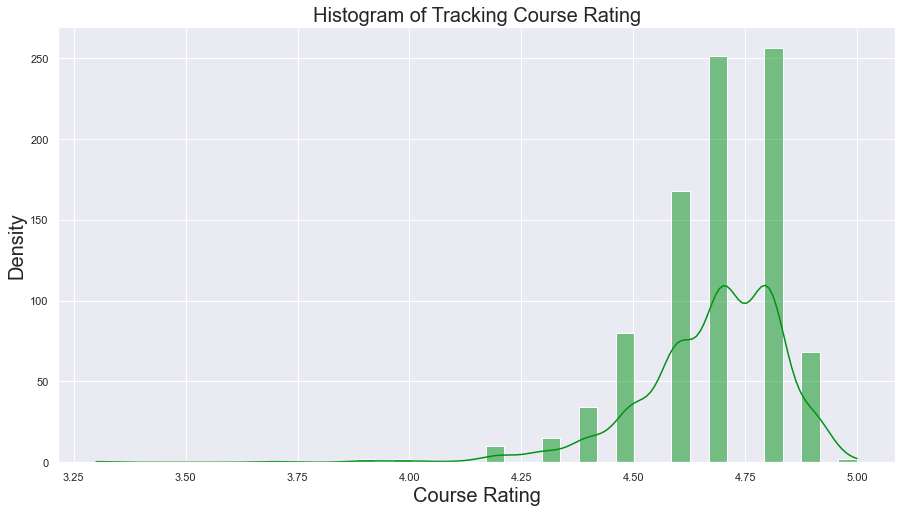

In [204]:

# plt.figure(figsize=(16,12)) # Figure Size
# sns.distplot(mydf.course_rating)

plt.figure(figsize=(15, 8))
sns.histplot(data=mydf, x="course_rating", color="#009213", kde=True)
plt.title("Histogram of Tracking Course Rating", fontsize=20)
plt.xlabel("Course Rating", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.show()


#### Co-reltion between Course Rating and the Course Students Enrolled

In [116]:
#Relation between variables
mydf.corr(method="pearson")

course_rating  course_students_enrolled
course_rating                   1.00000                   0.07109
course_students_enrolled        0.07109                   1.00000

In [117]:
col_name = ["id", "title", "organizer", "type", "rating", "difficulty", "students"]
mysort = pd.read_csv("data/coursea_data.csv",header=0, names=col_name, index_col="id").sort_values("id")


##### Checking with particuler couse institution name Google Cloud

In [149]:
#Particular course institution-Google
particular_institution = "Google Cloud"
mask = mysort["organizer"] == particular_institution
mysort[mask].sort_values(by='rating', ascending=False)

NameError: name 'mysort' is not defined

###### Number of course organization in the coursera Dataset

In [153]:
# Number of organization in the Coursera Dataset
organization=mydf.course_organization.unique()
organization
len(organization)
for i,item in enumerate(organization):
    print(i+1,' ',item)

1   (ISC)²
2   University of Pennsylvania
3   Johns Hopkins University
4   Yale University
5   Indian School of Business
6   University at Buffalo
7   deeplearning.ai
8   IBM
9   Amazon Web Services
10   University of Toronto
11   University of California, Irvine
12   University of Illinois at Urbana-Champaign
13   University of Michigan
14   Universidad Nacional Autónoma de México
15   University of Colorado Boulder
16   National Research University Higher School of Economics
17   Google Cloud
18   Erasmus University Rotterdam
19   Duke University
20   University of Virginia
21   Atlassian
22   ScrumTrek
23   University of California San Diego
24   Stanford University
25   University of Colorado System
26   Copenhagen Business School
27   Macquarie University
28   Vanderbilt University
29   The University of Edinburgh
30   Technical University of Denmark (DTU)
31   Universidad Austral
32   Arizona State University
33   The Museum of Modern Art
34   National Arts Strategies
35   Univer

###### Number of Course in the coursera dataset

In [132]:
# Unique course title in Coursera dataset
course_title1=mydf.course_title.unique()
print(len(course_title1)) # print total(value) unique title 
print(course_title1) # print the unique titles

888
['(ISC)² Systems Security Certified Practitioner (SSCP)'
 'A Crash Course in Causality:  Inferring Causal Effects from Observational Data'
 'A Crash Course in Data Science' "A Law Student's Toolkit"
 'A Life of Happiness and Fulfillment'
 'ADHD: Everyday Strategies for Elementary Students' 'AI For Everyone'
 'AI For Medical Treatment' 'AI Foundations for Everyone'
 'AI for Medical Diagnosis' 'AI for Medical Prognosis' 'AI for Medicine'
 'AWS Fundamentals' 'AWS Fundamentals: Addressing Security Risk'
 'AWS Fundamentals: Building Serverless Applications'
 'AWS Fundamentals: Going Cloud-Native'
 'AWS Fundamentals: Migrating to the Cloud'
 'Aboriginal Worldviews and Education' 'Academic English: Writing'
 'Accelerated Computer Science Fundamentals' 'Access Controls'
 'Accounting Analytics' 'Accounting for Decision Making'
 'Achieving Personal and Professional Success'
 'Actualización en el manejo del paciente con diabetes mellitus tipo 2'
 'Addiction Treatment: Clinical Skills for Heal

In [133]:
# Total number of unique courses
print("No. of unique courses:",mydf['course_title'].nunique())

No. of unique courses: 888


In [134]:
# Totalnumber of unique course organizations
print("No. of unique course organizations:",mydf['course_organization'].nunique())

No. of unique course organizations: 154


In [135]:
# Number of courses in  University of Pennsylvania 

UOP=mydf[mydf['course_organization']=='University of Pennsylvania']
# Courses and specialization by University of Pennsylvania 
len(UOP)

59

In [136]:
# Course certificate type of University of Pennsylvania 
UOP['course_Certificate_type'].value_counts()

COURSE            44
SPECIALIZATION    15
Name: course_Certificate_type, dtype: int64

In [125]:
# Total students enrolled in all courses of University of Pennsylvania 
UOP['course_students_enrolled'].sum()

5501300

In [126]:
#  Course difficulty of courses of  University of Pennsylvania 
UOP['course_difficulty'].value_counts()

Beginner        28
Mixed           26
Intermediate     5
Name: course_difficulty, dtype: int64

In [377]:
# Course_difficulty of the courses and specialization of University of Pennsylvania  
# check which course on which course_difficulty

m=pd.DataFrame(UOP.groupby(['course_difficulty','course_title']).groups)
m.T

0
Beginner     Achieving Personal and Professional Success          23
             An Introduction to American Law                      41
             Business Analytics                                  109
             Business Foundations                                113
             Business Strategies for A Better World              116
             Business and Financial Modeling                     121
             Computational Thinking for Problem Solving          151
             Culture-Driven Team Building                        178
             English for Business and Entrepreneurship           260
             English for Science, Technology, Engineering, a...  264
             Entrepreneurship                                    267
             Entrepreneurship 3: Growth Strategies               270
             FinTech: Foundations, Payments, and Regulations     305
             Finance & Quantitative Modeling for Analysts        306
             Financial Acumen for Non-Financial Managers         310
             Fintech: Foundations & Applications of Financia...  321
             Foundations of Positive Psychology                  332
             Fundamentos Empresariales                           355
             Introduction to Dental Medicine                     488
             Introduction to Intellectual Property               501
             Managing Social and Human Capital                   579
             Positive Psychology: Applications and Intervent...  657
             Positive Psychology: Martin E. P. Seligman’s Vi...  658
             Positive Psychology: Resilience Skills              659
             Robotics                                            704
             Social Norms, Social Change I                       733
             Success                                             764
             The Business of Health Care                         795
Intermediate A Crash Course in Causality:  Inferring Causal ...    1
             Healthcare Law                                      406
             Intellectual Property Law                           448
             The Oral Cavity: Portal to Health and Disease       807
             Wonders of Ancient Egypt                            867
Mixed        Accounting Analytics                                 21
             Ancient Philosophy: Aristotle and His Successors     48
             Decision-Making and Scenarios                       210
             Effective Compliance Programs                       249
             English for Career Development                      261
             English for Journalism                              262
             Entrepreneurship 1: Developing the Opportunity      268
             Entrepreneurship 2: Launching your Start-Up         269
             Fundamentals of Quantitative Modeling               352
             Gamification                                        366
             Global Trends for Business and Society              386
             Greek and Roman Mythology                           395
             Introduction to Corporate Finance                   481
             Introduction to Financial Accounting                494
             Introduction to Marketing                           503
             Introduction to Operations Management               505
             Introduction to Spreadsheets and Models             515
             Microeconomics: The Power of Markets                604
             Modeling Risk and Realities                         608
             More Introduction to Financial Accounting           614
             Operations Analytics                                639
             People Analytics                                    649
             The Economics of Health Care Delivery               801
             Viral Marketing and How to Craft Contagious Con...  854
             Vital Signs: Understanding What the Body Is Tel...  

In [127]:
# Summarize only the data needed for analysis
mydf[['course_title','course_rating','course_difficulty','course_students_enrolled']]


course_title  course_rating  \
0    (ISC)² Systems Security Certified Practitioner...            4.7   
1    A Crash Course in Causality:  Inferring Causal...            4.7   
2                       A Crash Course in Data Science            4.5   
3                              A Law Student's Toolkit            4.7   
4                  A Life of Happiness and Fulfillment            4.8   
..                                                 ...            ...   
886                         Программирование на Python            4.5   
887               Психолингвистика (Psycholinguistics)            4.8   
888       Разработка интерфейсов: вёрстка и JavaScript            4.5   
889                            Русский как иностранный            4.6   
890      Финансовые инструменты для частного инвестора            4.7   

    course_difficulty  course_students_enrolled  
0            Beginner                      5300  
1        Intermediate                     17000  
2               Mixed                    130000  
3               Mixed                     91000  
4               Mixed                    320000  
..                ...                       ...  
886      Intermediate                     52000  
887             Mixed                     21000  
888      Intermediate                     30000  
889      Intermediate                      9800  
890          Beginner                     38000  

[891 rows x 4 columns]

In [128]:

# create DataFrame
df2 = pd.DataFrame(mydf[['course_title','course_rating','course_difficulty','course_students_enrolled']])
df2.columns=['title', 'rating', 'level', 'enrolled']
df2

title  rating         level  \
0    (ISC)² Systems Security Certified Practitioner...     4.7      Beginner   
1    A Crash Course in Causality:  Inferring Causal...     4.7  Intermediate   
2                       A Crash Course in Data Science     4.5         Mixed   
3                              A Law Student's Toolkit     4.7         Mixed   
4                  A Life of Happiness and Fulfillment     4.8         Mixed   
..                                                 ...     ...           ...   
886                         Программирование на Python     4.5  Intermediate   
887               Психолингвистика (Psycholinguistics)     4.8         Mixed   
888       Разработка интерфейсов: вёрстка и JavaScript     4.5  Intermediate   
889                            Русский как иностранный     4.6  Intermediate   
890      Финансовые инструменты для частного инвестора     4.7      Beginner   

     enrolled  
0        5300  
1       17000  
2      130000  
3       91000  
4      320000  
..        ...  
886     52000  
887     21000  
888     30000  
889      9800  
890     38000  

[891 rows x 4 columns]

In [291]:
# All Python Programming courses in Coursera
df2[df2['title'].str.contains('Python')].sort_values(by=['enrolled'], ascending=False)

title  rating         level  \
688                               Python for Everybody     4.8      Beginner   
674  Programming for Everybody (Getting Started wit...     4.8         Mixed   
56                    Applied Data Science with Python     4.5  Intermediate   
684                             Python Data Structures     4.9         Mixed   
487             Introduction to Data Science in Python     4.5  Intermediate   
850                    Using Python to Access Web Data     4.8         Mixed   
849                        Using Databases with Python     4.8         Mixed   
687                     Python for Data Science and AI     4.6      Beginner   
57                  Applied Machine Learning in Python     4.6  Intermediate   
570                       Machine Learning with Python     4.7  Intermediate   
530  Introdução à Ciência da Computação com Python ...     4.9      Beginner   
682                                      Python Basics     4.8      Beginner   
188                          Data Analysis with Python     4.7      Beginner   
466  Introducción a la programación en Python I: Ap...     4.4      Beginner   
58   Applied Plotting, Charting & Data Representati...     4.6  Intermediate   
391                   Google IT Automation with Python     4.7      Beginner   
883                  Основы программирования на Python     4.6      Beginner   
128  Capstone: Retrieving, Processing, and Visualiz...     4.6         Mixed   
171                             Crash Course on Python     4.8      Beginner   
880             Математика и Python для анализа данных     4.8      Beginner   
203                     Data Visualization with Python     4.6  Intermediate   
886                         Программирование на Python     4.5  Intermediate   
513                Introduction to Scripting in Python     4.7      Beginner   
885                                Погружение в Python     4.7  Intermediate   
686       Python and Statistics for Financial Analysis     4.4  Intermediate   
752                             Statistics with Python     4.6      Beginner   
841     Understanding and Visualizing Data with Python     4.7      Beginner   
685          Python Functions, Files, and Dictionaries     4.8      Beginner   
683                     Python Classes and Inheritance     4.7  Intermediate   
851  Using Python to Interact with the Operating Sy...     4.7      Beginner   
190         Data Collection and Processing with Python     4.7  Intermediate   
532  Investment Management with Python and Machine ...     4.6      Beginner   
508  Introduction to Portfolio Construction and Ana...     4.8         Mixed   
59                      Aprende a programar con Python     4.2      Beginner   

     enrolled  
688   1500000  
674   1300000  
56     480000  
684    420000  
487    390000  
850    310000  
849    220000  
687    170000  
57     150000  
570    120000  
530    120000  
682    110000  
188    110000  
466    100000  
58      97000  
391     93000  
883     83000  
128     82000  
171     81000  
880     67000  
203     66000  
886     52000  
513     49000  
885     45000  
686     41000  
752     34000  
841     30000  
685     26000  
683     21000  
851     19000  
190     19000  
532     14000  
508     11000  
59       6600

In [380]:
# ALL Machine Learning Courses
df2[df2['title'].str.contains('Machine')].sort_values(by=['enrolled'], ascending=False)

title  rating         level  \
564                                   Machine Learning     4.9         Mixed   
563                                   Machine Learning     4.6  Intermediate   
565  Machine Learning Foundations: A Case Study App...     4.6         Mixed   
763              Structuring Machine Learning Projects     4.8      Beginner   
200      Data Science: Statistics and Machine Learning     4.4  Intermediate   
28                           Advanced Machine Learning     4.5      Advanced   
520  Introduction to TensorFlow for Artificial Inte...     4.7  Intermediate   
595                   Mathematics for Machine Learning     4.6      Beginner   
57                  Applied Machine Learning in Python     4.6  Intermediate   
596   Mathematics for Machine Learning: Linear Algebra     4.7      Beginner   
389  Google Cloud Platform Big Data and Machine Lea...     4.6  Intermediate   
193  Data Engineering, Big Data, and Machine Learni...     4.6  Intermediate   
570                       Machine Learning with Python     4.7  Intermediate   
375          Getting Started with AWS Machine Learning     4.5  Intermediate   
571  Machine Learning with TensorFlow on Google Clo...     4.5  Intermediate   
568        Machine Learning for Business Professionals     4.6  Intermediate   
597  Mathematics for Machine Learning: Multivariate...     4.7      Beginner   
29   Advanced Machine Learning with TensorFlow on G...     4.5      Advanced   
598              Mathematics for Machine Learning: PCA     4.0  Intermediate   
566  Machine Learning and Reinforcement Learning in...     3.7  Intermediate   
567                           Machine Learning for All     4.6      Beginner   
569                       Machine Learning for Trading     3.9  Intermediate   
532  Investment Management with Python and Machine ...     4.6      Beginner   
522    Introduction to Trading, Machine Learning & GCP     4.0  Intermediate   

     enrolled  
564   3200000  
563    290000  
565    240000  
763    220000  
200    210000  
28     190000  
520    150000  
595    150000  
57     150000  
596    140000  
389    120000  
193    120000  
570    120000  
375     73000  
571     72000  
568     58000  
597     51000  
29      35000  
598     33000  
566     29000  
567     19000  
569     15000  
532     14000  
522     13000

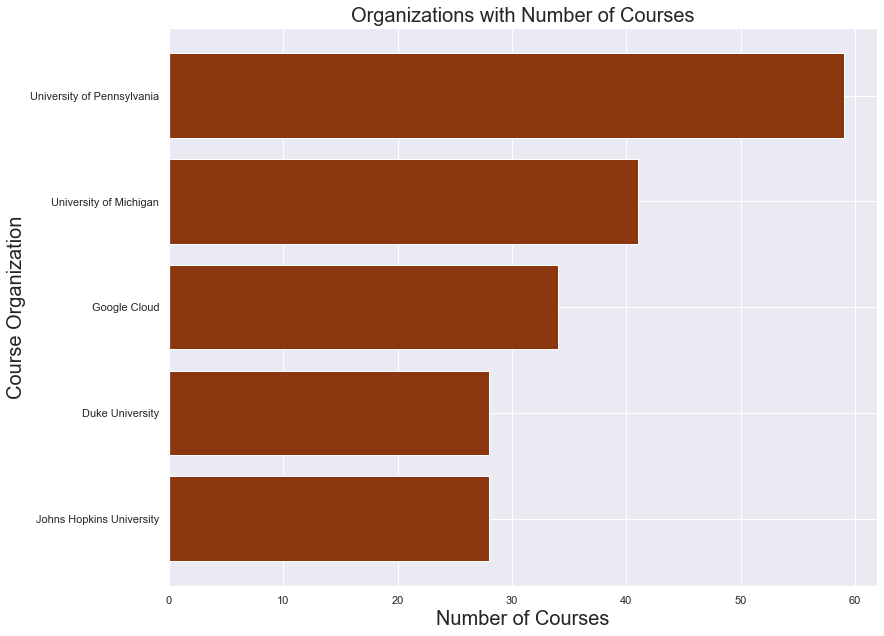

In [389]:
#  University on the top of  getting maximum student enrolled in one particulr course

#  which university organization have how many courses on coursera
organization=mydf['course_organization'].value_counts().sort_values(ascending=False)
organization=organization.head(5)
organization=organization.reset_index()
organization.columns=['course_organization','number of courses']

plt.barh(organization['course_organization'],organization['number of courses'],color ='#8A360F')
plt.title('Organizations with Number of Courses', fontsize =20)
plt.xlabel('Number of Courses', fontsize =20)
plt.ylabel('Course Organization', fontsize =20)
plt.gca().invert_yaxis()

In [381]:
# the column named 'course_students_enrolled' 
# having k with each value lets change this with 1000 so, that column look normal
mydf['course_students_enrolled']=mydf['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)

                                  course_students_enrolled
course_organization                                       
University of Michigan                             7437700
University of Pennsylvania                         5501300
Stanford University                                4854000
University of California, Irvine                   4326000
Johns Hopkins University                           4298900


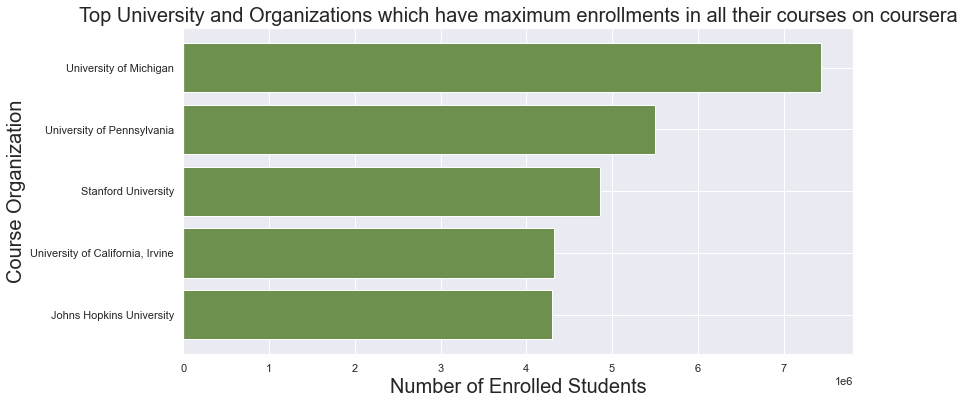

In [213]:
#  The Top 5 University/Organization who have maximum student enrollment in all the courses 
# they have on the coursera
enrollment=pd.DataFrame(mydf.groupby(['course_organization'])['course_students_enrolled'].sum().sort_values(ascending=False))
enrollment=enrollment[:5]
print(enrollment)

# plotting
x=enrollment.index
y=enrollment['course_students_enrolled']
plt.figure(figsize=(12,6))
plt.barh(x,y,color ='#6d904f')
plt.gca().invert_yaxis()
plt.title('Top University and Organizations which have maximum enrollments in all their courses on coursera', fontsize =20)
plt.xlabel('Number of Enrolled Students', fontsize =20)
plt.ylabel('Course Organization', fontsize =20)

plt.show()

###### 

In [382]:
# Number of courses and specialization University of Michigan  

UOM=mydf[mydf['course_organization']=='University of Michigan']
# print(UOM)
# Total courses and specialization by university of michigan
len(UOM)

41

In [383]:
# Course certificate type of University of Michigan
UOM['course_Certificate_type'].value_counts()

COURSE            30
SPECIALIZATION    11
Name: course_Certificate_type, dtype: int64

In [384]:
# Total number students enrolled in all courses of University of Michigan
UOM['course_students_enrolled'].sum()

7437700

In [385]:
# Course difficulty of courses of University of Michigan
UOM['course_difficulty'].value_counts()

Beginner        19
Mixed           12
Intermediate    10
Name: course_difficulty, dtype: int64

In [386]:
# Course certificate type of University of Michigan
UOM['course_Certificate_type'].value_counts()

COURSE            30
SPECIALIZATION    11
Name: course_Certificate_type, dtype: int64

In [302]:
#Top 10 courses based on rating
findtencourse=mydf[['course_title','course_rating']]
Tencourse = findtencourse.nlargest(10,['course_rating'])
Tencourse

course_title  course_rating
251  El Abogado del Futuro: Legaltech y la Transfor...            5.0
432                       Infectious Disease Modelling            5.0
36   Agile и Scrum в работе над проектами и продуктами            4.9
40                             American Contract Law I            4.9
61   Aprendiendo a aprender: Poderosas herramientas...            4.9
65                      Arizona State University TESOL            4.9
70   Aspectos básicos de la planificación y la gest...            4.9
82   Become a CBRS Certified Professional Installer...            4.9
98                  Boosting Creativity for Innovation            4.9
99   Brand Management: Aligning Business, Brand and...            4.9

In [ ]:
#highest rated course organization

# Research Q6: Can we find common paths through courses that students take?
>- Based on observations in graph student mostly prefer courses which having rating highest rating with mixed course difficulty level

#### Displaying the number of courses ny Certification type and the Number of courses by difficulty types

Text(0.5, 1.0, 'Coures Enrollment Count Based on Rating and Course difficulty')

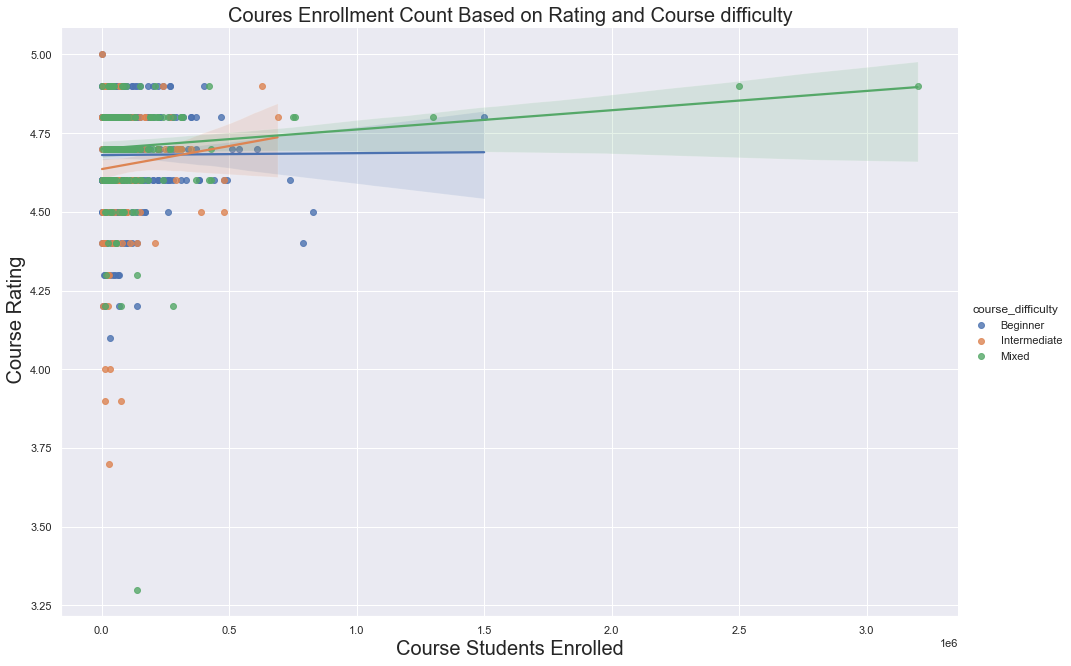

In [154]:
sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_difficulty", data=mydf.loc[mydf["course_difficulty"].isin(['Beginner','Intermediate','Mixed'])], 
           fit_reg=True, height=9, aspect=1.5)
plt.ylabel(" Course Rating", fontsize =20)
plt.xlabel("Course Students Enrolled", fontsize =20)
plt.title("Coures Enrollment Count Based on Rating and Course difficulty", fontsize =20)

Text(0.5, 1.0, 'Coures Enrollment Count Based on Rating and Course_Certificate Type ')

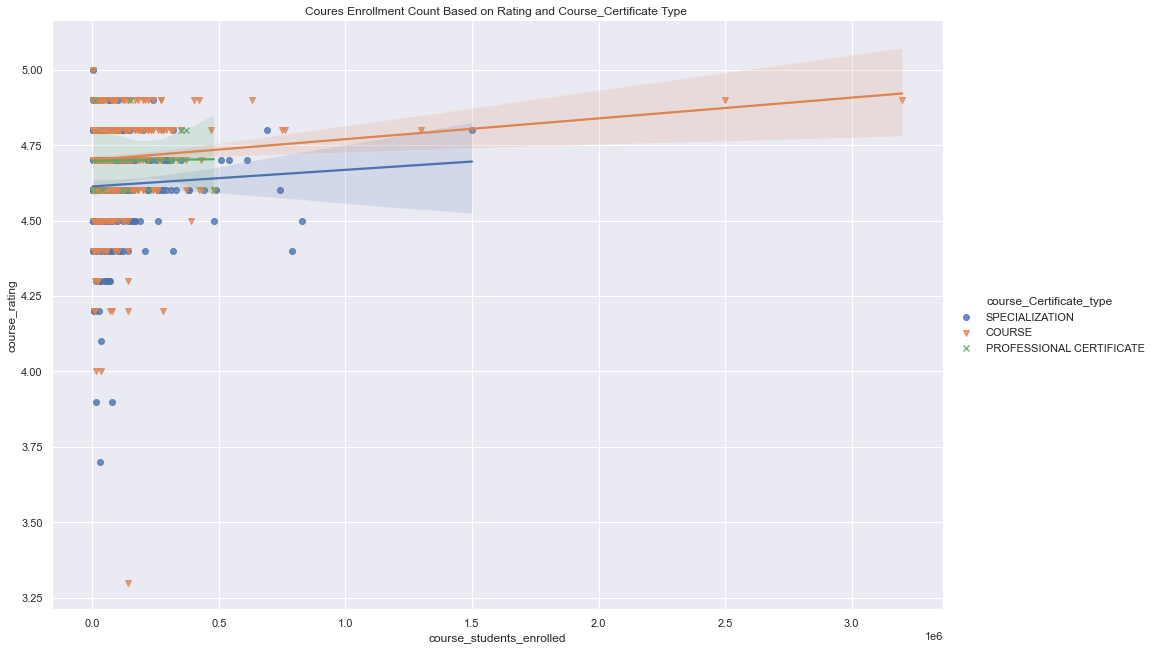

In [94]:

sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_Certificate_type", 
           data=mydf.loc[mydf["course_Certificate_type"].isin(['PROFESSIONAL CERTIFICATE','COURSE','SPECIALIZATION'])], 
           fit_reg=True,markers =['o', 'v','x'], height=9, aspect=1.5)
plt.title("Coures Enrollment Count Based on Rating and Course_Certificate Type ", fontsize =12)


Text(0.5, 1.0, 'Coures Enrollment Count Based on Rating and Course Organization')

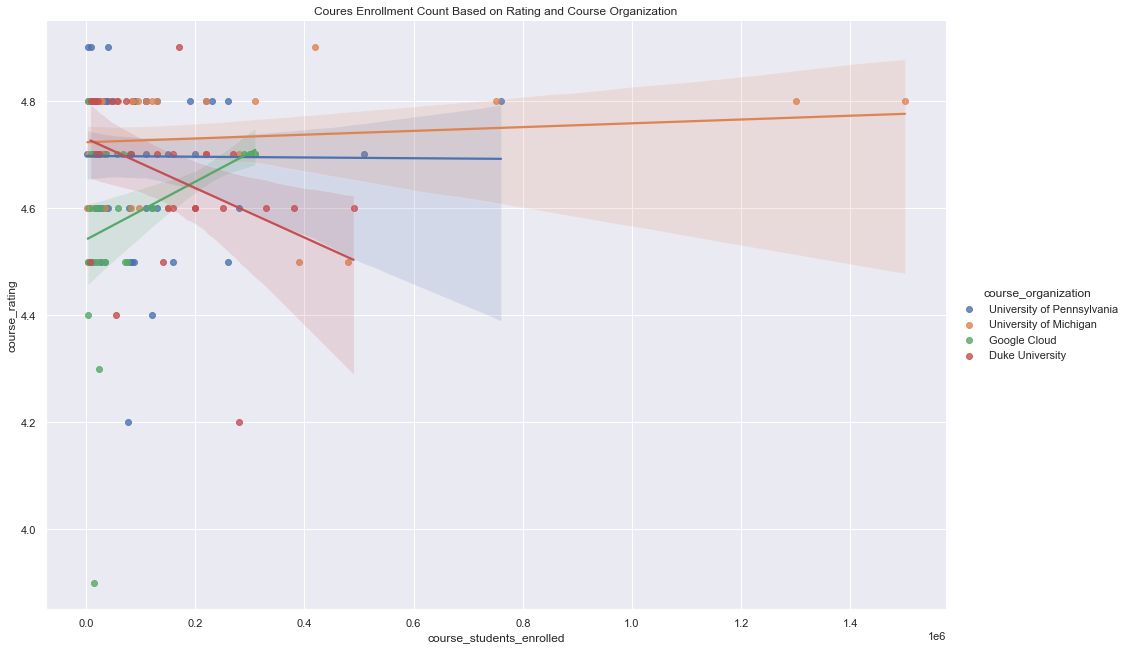

In [155]:
sns.lmplot(x="course_students_enrolled", y="course_rating", hue ="course_organization", 
           data=mydf.loc[mydf["course_organization"].isin(['University of Pennsylvania','University of Michigan','Google Cloud','Duke University'   ])], 
           fit_reg=True, height=9, aspect=1.5)
plt.title("Coures Enrollment Count Based on Rating and Course Organization", fontsize =12)

# To find Course popularity difference between university courses and online courses in Coursera

In [156]:
#Loading Coursera Dataset
uni = pd.read_csv('data/coursea_data.csv')
list_cct = list(uni['course_Certificate_type'])
list_cd = list(uni['course_difficulty'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
le.fit(list_cct)
le1.fit(list_cd)
#uni['course_Certificate_type'] = le.transform(uni['course_Certificate_type'])
#uni['course_difficulty'] = le1.transform(uni['course_difficulty'])
uni

Unnamed: 0                                       course_title  \
0           134  (ISC)² Systems Security Certified Practitioner...   
1           743  A Crash Course in Causality:  Inferring Causal...   
2           874                     A Crash Course in Data Science   
3           413                            A Law Student's Toolkit   
4           635                A Life of Happiness and Fulfillment   
..          ...                                                ...   
886         236                         Программирование на Python   
887         883               Психолингвистика (Psycholinguistics)   
888         545       Разработка интерфейсов: вёрстка и JavaScript   
889         875                            Русский как иностранный   
890         163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

    course_students_enrolled  
0                       5.3k  
1                        17k  
2                       130k  
3                        91k  
4                       320k  
..                       ...  
886                      52k  
887                      21k  
888                      30k  
889                     9.8k  
890                      38k  

[891 rows x 7 columns]

In [157]:
uni= uni.rename(columns={"Unnamed: 0": "course_id"})
uni['course_students_enrolled']

def coursera_function(a):
    if 'k' in a:
        return float(str(a).replace('k', '')) * (10 ** 3)
    if 'm' in a:
        return float(str(a).replace('m', '')) * (10 ** 6)
    else:
        return float(a)
uni['course_students_enrolled'] = uni['course_students_enrolled'].apply(coursera_function)
uni.head()

course_id                                       course_title  \
0        134  (ISC)² Systems Security Certified Practitioner...   
1        743  A Crash Course in Causality:  Inferring Causal...   
2        874                     A Crash Course in Data Science   
3        413                            A Law Student's Toolkit   
4        635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty  course_students_enrolled  
0          Beginner                    5300.0  
1      Intermediate                   17000.0  
2             Mixed                  130000.0  
3             Mixed                   91000.0  
4             Mixed                  320000.0

In [160]:
keywords = ['University']
uni['keyword'] = uni['course_organization'].str.findall('|'.join(keywords)).apply(set).str.join(', ')
for keyword in keywords:
   uni[keyword] =uni['course_organization'].str.contains(keyword)
uni

course_id                                       course_title  \
0          134  (ISC)² Systems Security Certified Practitioner...   
1          743  A Crash Course in Causality:  Inferring Causal...   
2          874                     A Crash Course in Data Science   
3          413                            A Law Student's Toolkit   
4          635                A Life of Happiness and Fulfillment   
..         ...                                                ...   
886        236                         Программирование на Python   
887        883               Психолингвистика (Psycholinguistics)   
888        545       Разработка интерфейсов: вёрстка и JavaScript   
889        875                            Русский как иностранный   
890        163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

     course_students_enrolled     keyword  University  
0                      5300.0                   False  
1                     17000.0  University        True  
2                    130000.0  University        True  
3                     91000.0  University        True  
4                    320000.0                   False  
..                        ...         ...         ...  
886                   52000.0                   False  
887                   21000.0  University        True  
888                   30000.0                   False  
889                    9800.0  University        True  
890                   38000.0  University        True  

[891 rows x 9 columns]

In [161]:

#uni.drop(['keyword'], axis = 1, inplace = True) 
uni['University'] =uni['University'].map({True: 'University_Courses', False: 'Other_Organisation_Courses'})
uni

course_id                                       course_title  \
0          134  (ISC)² Systems Security Certified Practitioner...   
1          743  A Crash Course in Causality:  Inferring Causal...   
2          874                     A Crash Course in Data Science   
3          413                            A Law Student's Toolkit   
4          635                A Life of Happiness and Fulfillment   
..         ...                                                ...   
886        236                         Программирование на Python   
887        883               Психолингвистика (Psycholinguistics)   
888        545       Разработка интерфейсов: вёрстка и JavaScript   
889        875                            Русский как иностранный   
890        163      Финансовые инструменты для частного инвестора   

                                   course_organization  \
0                                               (ISC)²   
1                           University of Pennsylvania   
2                             Johns Hopkins University   
3                                      Yale University   
4                            Indian School of Business   
..                                                 ...   
886                                      Mail.Ru Group   
887                  Saint Petersburg State University   
888                        E-Learning Development Fund   
889                  Saint Petersburg State University   
890  National Research University Higher School of ...   

    course_Certificate_type  course_rating course_difficulty  \
0            SPECIALIZATION            4.7          Beginner   
1                    COURSE            4.7      Intermediate   
2                    COURSE            4.5             Mixed   
3                    COURSE            4.7             Mixed   
4                    COURSE            4.8             Mixed   
..                      ...            ...               ...   
886          SPECIALIZATION            4.5      Intermediate   
887                  COURSE            4.8             Mixed   
888          SPECIALIZATION            4.5      Intermediate   
889          SPECIALIZATION            4.6      Intermediate   
890          SPECIALIZATION            4.7          Beginner   

     course_students_enrolled     keyword                  University  
0                      5300.0              Other_Organisation_Courses  
1                     17000.0  University          University_Courses  
2                    130000.0  University          University_Courses  
3                     91000.0  University          University_Courses  
4                    320000.0              Other_Organisation_Courses  
..                        ...         ...                         ...  
886                   52000.0              Other_Organisation_Courses  
887                   21000.0  University          University_Courses  
888                   30000.0              Other_Organisation_Courses  
889                    9800.0  University          University_Courses  
890                   38000.0  University          University_Courses  

[891 rows x 9 columns]

Text(0.5, 1.0, 'Popularity measure with other organisations and University courses analysis with respect to course difficulty ')

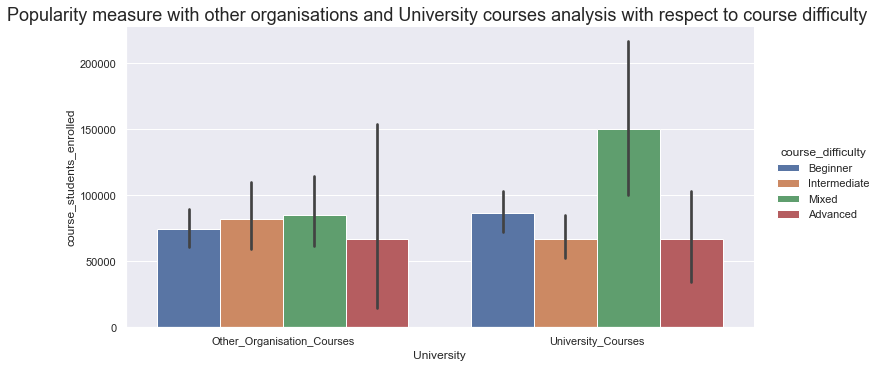

In [162]:

sns.catplot(x="University", y="course_students_enrolled", hue="course_difficulty",kind="bar", data=uni,height=5, aspect=2)
plt.title("Popularity measure with other organisations and University courses analysis with respect to course difficulty ", fontsize =18)



Text(0.5, 1.0, 'Coures Enrollment Count Based on Rating and Course difficulty for Udemy')

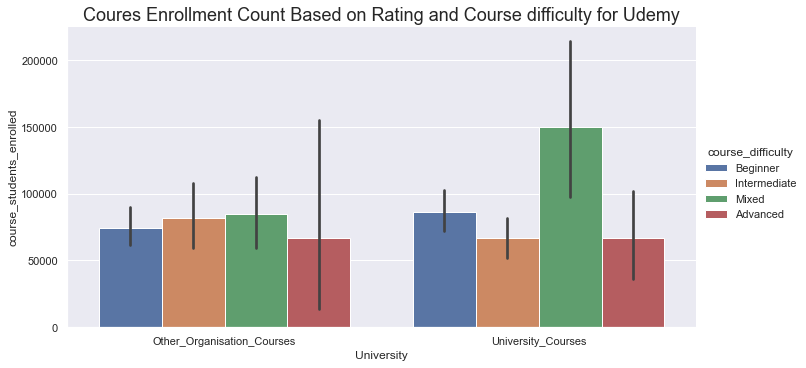

In [104]:

sns.catplot(y="course_students_enrolled", x="University", hue="course_difficulty",kind="bar", data=uni,height=5, aspect=2)
plt.title("Coures Enrollment Count Based on Rating and Course difficulty for Udemy", fontsize =18)

### Popularity check in term of course title

In [163]:
#Top courses of enrolment
popular_4_courses = mydf.loc[:,['course_title', 'course_students_enrolled']]
popular_4_courses = popular_4_courses.sort_values(by=['course_students_enrolled'], ascending=False)
popular_4_courses = popular_4_courses.head(4)
popular_4_courses


course_title  \
564                                   Machine Learning   
815                          The Science of Well-Being   
688                               Python for Everybody   
674  Programming for Everybody (Getting Started wit...   

     course_students_enrolled  
564                   3200000  
815                   2500000  
688                   1500000  
674                   1300000

In [164]:
# sns.catplot(x="University", y="course_students_enrolled", hue="course_title", kind="bar,data=uni,height=5, aspect=2)
# plt.title("Popularity measure  with other Organisation  and university Courses Analysis with respect to course difficulty ", fontsize =18)

